<a href="https://colab.research.google.com/github/HoangOanh-dev/SVM---Vietnamese-Sentiment-Classification/blob/main/SVM_TranThiHoangOanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vietnamese Sentiment Classification using SVM

## Bước 0: Thư viện cần thiết


### Tải thư viện:


In [ ]:
!pip install underthesea  # Tách từ Tiếng Việt với underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.9 MB/s eta 0:00:00


### Import thư viện:

In [ ]:
# Thư viện để xử lý dữ liệu cơ bản và trực quan hóa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Nhóm thư viện xử lý NLP
import re
from underthesea import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Thư viện hiện đại hơn TF-IDF
# from gensim.models import Word2Vec
# from transformers import AutoTokenizer, AutoModel
# import torch

# Nhóm thư viện sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

## Bước 1: Tải dữ liệu

## Tải dữ liệu đã làm sạch

In [ ]:
from google.colab import drive
pdf_path = '/content/drive/MyDrive/Bản sao của Lộ trình try hard.pdf'


In [ ]:
z!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 45.2 MB/s eta 0:00:00


In [ ]:
import fitz  # PyMuPDF

pdf_path = '/content/drive/MyDrive/Bản sao của Lộ trình try hard.pdf'
doc = fitz.open(pdf_path)

for page_num, page in enumerate(doc, 1):
    text = page.get_text()
    print(f"----- 📄 Trang {page_num} -----\n{text}\n")

----- 📄 Trang 1 -----
 
  Tuần 1: Hồi quy tuyến tính (Linear Regression)  
✔ Ngày 1: Hồi quy tuyến tính là gì? Giải thích trực quan với ví dụ dễ hiểu 
✔ Ngày 2: Gradient Descent là gì? Cách tìm đường thẳng tốt nhất 
✔ Ngày 3: Loss function là gì? Mean Squared Error (MSE) và ý nghĩa 
✔ Ngày 4: Công thức hồi quy tuyến tính – Phân tích & xây dựng từ đầu 
✔ Ngày 5: Tự code Linear Regression từ đầu bằng Python 
 
  Tuần 2: Ứng dụng Linear Regression + Đánh giá mô hình  
✔ Ngày 6: Sử dụng scikit-learn để train Linear Regression (Project #1) 
✔ Ngày 7: Đánh giá mô hình hồi quy (MAE, MSE) 
✔ Ngày 8: Đánh giá mô hình hồi quy (R² Score, MAPE) 
✔ Ngày 9: Cách cải thiện mô hình hồi quy – Feature Engineering cơ bản 
✔ Ngày 10: Mini Project #1: Dự đoán giá nhà bằng Linear Regression 
 
 
 


----- 📄 Trang 2 -----
  Tuần 3: Hồi quy logistic (Logistic Regression)  
✔ Ngày 11: Logistic Regression là gì? Ứng dụng thực tế 
✔ Ngày 12: Công thức sigmoid & Decision Boundary – Trực quan hóa thuật toán 
✔ Ngà

### Đọc file

In [ ]:
import pandas as pd
import fitz  # PyMuPDF

# Đường dẫn file PDF
pdf_path = '/content/drive/MyDrive/Bản sao của Lộ trình try hard.pdf'

# Mở file PDF
doc = fitz.open(pdf_path)

# Lưu nội dung từng trang vào danh sách
pages_text = []

for page_num, page in enumerate(doc, 1):
    text = page.get_text()
    pages_text.append({'page': page_num, 'content': text})

# Tạo DataFrame từ nội dung PDF
df = pd.DataFrame(pages_text)

# Hiển thị 5 dòng đầu tiên
display(df.head())
print('-' * 200)


,page,content
0,1,"\n Tuần 1: Hồi quy tuyến tính (Linear Regression) \n✔ Ngày 1: Hồi quy tuyến tính là gì? Giải thích trực quan với ví dụ dễ hiểu \n✔ Ngày 2: Gradient Descent là gì? Cách tìm đường thẳng tốt nhất \n✔ Ngày 3: Loss function là gì? Mean Squared Error (MSE) và ý nghĩa \n✔ Ngày 4: Công thức hồi quy tuyến tính – Phân tích & xây dựng từ đầu \n✔ Ngày 5: Tự code Linear Regression từ đầu bằng Python \n \n Tuần 2: Ứng dụng Linear Regression + Đánh giá mô hình \n✔ Ngày 6: Sử dụng scikit-learn để train Linear Regression (Project #1) \n✔ Ngày 7: Đánh giá mô hình hồi quy (MAE, MSE) \n✔ Ngày 8: Đánh giá mô hình hồi quy (R² Score, MAPE) \n✔ Ngày 9: Cách cải thiện mô hình hồi quy – Feature Engineering cơ bản \n✔ Ngày 10: Mini Project #1: Dự đoán giá nhà bằng Linear Regression \n \n \n \n"
1,2,"Tuần 3: Hồi quy logistic (Logistic Regression) \n✔ Ngày 11: Logistic Regression là gì? Ứng dụng thực tế \n✔ Ngày 12: Công thức sigmoid & Decision Boundary – Trực quan hóa thuật toán \n✔ Ngày 13: Cross-Entropy Loss là gì? Giải thích chuyên sâu \n✔ Ngày 14: Tự code Logistic Regression từ đầu bằng Python \n✔ Ngày 15: Sử dụng scikit-learn để train Logistic Regression (Project #2) \n \n Tuần 4: Đánh giá mô hình phân loại + Ứng dụng Logistic \n✔ Ngày 16: Đánh giá mô hình phân loại #1 (Confusion Matrix, Accuracy) \n✔ Ngày 17: Đánh giá mô hình phân loại #2 (Precision, Recall, F1-Score) \n✔ Ngày 18: Đánh giá mô hình phân loại #3 (AUC-ROC Curve) \n✔ Ngày 19: Mini Project #3: Dự đoán bệnh tiểu đường với Logistic Regression \n✔ Ngày 20: Tổng kết chương 1 – Ôn tập + hướng đi tiếp theo \n \n \n \n"
2,3,"Chương 2 – Supervised Learning \n Mục tiêu: Đào sâu các thuật toán học có giám sát, cài đặt từ đầu, kết hợp với \nscikit-learn. \n Thời gian: ~12 tuần \n \n Tuần 1-2: Hồi quy bậc cao (Polynomial Regression) \n✔ Ngày 1: Hồi quy bậc cao là gì? So sánh với hồi quy tuyến tính \n✔ Ngày 2: Toán học của hồi quy bậc cao (biến đổi dữ liệu) \n✔ Ngày 3: Tự code Polynomial Regression từ đầu bằng Python \n✔ Ngày 4: Sử dụng scikit-learn để train Polynomial Regression \n✔ Ngày 5: Cách chọn bậc đa thức phù hợp để tránh overfitting \n✔ Ngày 6: Feature Engineering trong Polynomial Regression \n✔ Ngày 7: Đánh giá mô hình Polynomial Regression (MAE, MSE, R²) \n✔ Ngày 8: Mini Project #1: Dự đoán giá nhà bằng Polynomial Regression \n✔ Ngày 9: Ridge & Lasso Regression – Regularization trong hồi quy \n✔ Ngày 10: Tổng kết hồi quy bậc cao – Luyện tập bài tập thực tế \n \n Tuần 3-4: Decision Tree & Random Forest \n✔ Ngày 11: Decision Tree là gì? Tư duy chia nhánh trực quan \n✔ Ngày 12: Gini Impurity vs Entropy – Cách cây quyết định học \n✔ Ngày 13: Tự code Decision Tree từ đầu bằng Python \n✔ Ngày 14: Train Decision Tree với scikit-learn \n✔ Ngày 15: Đánh giá Decision Tree (Precision, Recall, Confusion Matrix) \n✔ Ngày 16: Random Forest là gì? Tổng hợp nhiều cây để tăng độ chính xác \n✔ Ngày 17: Tự code Random Forest từ đầu bằng Python \n✔ Ngày 18: Train Random Forest với scikit-learn \n✔ Ngày 19: Mini Project #2: Dự đoán bệnh tim với Random Forest \n✔ Ngày 20: Tổng kết Decision Tree & Random Forest \n \n"
3,4,"Tuần 5-6: Support Vector Machine (SVM) \n✔ Ngày 21: SVM là gì? Hiểu ""đường biên tốt nhất"" trong phân loại \n✔ Ngày 22: Toán học của SVM – Hiểu về hyperplane & margin \n✔ Ngày 23: Tự code SVM từ đầu bằng Python \n✔ Ngày 24: Train SVM với scikit-learn \n✔ Ngày 25: Kernel Trick – Cách xử lý dữ liệu không tuyến tính \n✔ Ngày 26: Đánh giá SVM (AUC-ROC Curve, Precision-Recall) \n✔ Ngày 27: SVM cho bài toán phân loại nhiều lớp \n✔ Ngày 28: Mini Project #3: Phân loại chữ viết tay (MNIST) với SVM \n✔ Ngày 29: Mini Project #4: Phát hiện ung thư dựa trên SVM \n✔ Ngày 30: Tổng kết SVM – Hướng đi tiếp theo \n \n Tuần 7-8: Naive Bayes \n✔ Ngày 31: Naive Bayes là gì? Ứng dụng phân loại email spam \n✔ Ngày 32: Công thức toán học của Naive Bayes \n✔ Ngày 33: Tự code Naive Bayes từ đầu bằng Python \n✔ Ngày 34: Train Naive Bayes với scikit-learn \n✔ Ngày 35: Đánh giá Naive Bayes (Precision,

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### Kiểm tra 5-10 dòng đầu

In [ ]:
import pandas as pd
import fitz  # PyMuPDF

# Đọc PDF
pdf_path = '/content/drive/MyDrive/Bản sao của Lộ trình try hard.pdf'
doc = fitz.open(pdf_path)

data = []

# Giả sử mỗi trang chứa văn bản, và bạn sẽ gán nhãn tạm thời
for page_num, page in enumerate(doc, 1):
    text = page.get_text()
    # Chia từng dòng
    lines = text.split('\n')
    for line in lines:
        if line.strip():  # bỏ dòng rỗng
            # Ví dụ: cho nhãn tạm là 0 để test (sau này bạn có thể phân loại)
            data.append({'flag': 0, 'text': line})

# Tạo DataFrame
df = pd.DataFrame(data)


In [ ]:
print("📊 Hiển thị 10 dòng đầu tiên cho từng nhãn:")
print('='*100)

for label in sorted(df['flag'].unique()):
    print(f"\n🔹 10 dòng đầu cho nhãn {label}:")
    print('-'*100)
    for i, row in df[df['flag'] == label].head(10).iterrows():
        print(f"Dòng {i+1}: {row['text']}\n")

📊 Hiển thị 10 dòng đầu tiên cho từng nhãn:

🔹 10 dòng đầu cho nhãn 0:
----------------------------------------------------------------------------------------------------
Dòng 1:   Tuần 1: Hồi quy tuyến tính (Linear Regression)  

Dòng 2: ✔ Ngày 1: Hồi quy tuyến tính là gì? Giải thích trực quan với ví dụ dễ hiểu 

Dòng 3: ✔ Ngày 2: Gradient Descent là gì? Cách tìm đường thẳng tốt nhất 

Dòng 4: ✔ Ngày 3: Loss function là gì? Mean Squared Error (MSE) và ý nghĩa 

Dòng 5: ✔ Ngày 4: Công thức hồi quy tuyến tính – Phân tích & xây dựng từ đầu 

Dòng 6: ✔ Ngày 5: Tự code Linear Regression từ đầu bằng Python 

Dòng 7:   Tuần 2: Ứng dụng Linear Regression + Đánh giá mô hình  

Dòng 8: ✔ Ngày 6: Sử dụng scikit-learn để train Linear Regression (Project #1) 

Dòng 9: ✔ Ngày 7: Đánh giá mô hình hồi quy (MAE, MSE) 

Dòng 10: ✔ Ngày 8: Đánh giá mô hình hồi quy (R² Score, MAPE) 



### Kiểm tra lại dữ liệu đã tải lên và xóa NaN

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   flag    129 non-null    int64 
 1   text    129 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [ ]:
print(df.columns)

Index(['flag', 'text', 'tokenized'], dtype='object')


In [ ]:
df['tokenized'] = df['tokenized'].astype(str)
print(df['tokenized'].head(10))  # Hiện 10 dòng đầu

0                                                              ['Tuần', '1:', 'Hồi', 'quy', 'tuyến', 'tính', '(Linear', 'Regression)']
1    ['✔', 'Ngày', '1:', 'Hồi', 'quy', 'tuyến', 'tính', 'là', 'gì?', 'Giải', 'thích', 'trực', 'quan', 'với', 'ví', 'dụ', 'dễ', 'hiểu']
2                              ['✔', 'Ngày', '2:', 'Gradient', 'Descent', 'là', 'gì?', 'Cách', 'tìm', 'đường', 'thẳng', 'tốt', 'nhất']
3                        ['✔', 'Ngày', '3:', 'Loss', 'function', 'là', 'gì?', 'Mean', 'Squared', 'Error', '(MSE)', 'và', 'ý', 'nghĩa']
4             ['✔', 'Ngày', '4:', 'Công', 'thức', 'hồi', 'quy', 'tuyến', 'tính', '–', 'Phân', 'tích', '&', 'xây', 'dựng', 'từ', 'đầu']
5                                             ['✔', 'Ngày', '5:', 'Tự', 'code', 'Linear', 'Regression', 'từ', 'đầu', 'bằng', 'Python']
6                                              ['Tuần', '2:', 'Ứng', 'dụng', 'Linear', 'Regression', '+', 'Đánh', 'giá', 'mô', 'hình']
7                          ['✔', 'Ngày', '6:', 'Sử', 'd

### Lấy nhãn 0 và nhãn 2 tách nhãn 1

In [ ]:
df_1 = df[df['flag'] == 1].copy()
display(df_1.head())

,flag,text,tokenized


In [ ]:
df = df[(df['flag'] == 0) | (df['flag'] == 2)].copy()

#display(df['flag'].value_counts())

df['flag'] = df['flag'].map({
    2:1,
    0:0
})
display(df['flag'].value_counts())

,count
flag,
0,129


## Kết nối với Drive

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Sau khi mount, bạn có thể truy cập file trong Drive tại:
# /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import fitz  # PyMuPDF

# Đường dẫn tới file PDF
pdf_path = '/content/drive/MyDrive/Bản sao của Lộ trình try hard.pdf'

# Mở PDF
doc = fitz.open(pdf_path)

# Trích xuất toàn bộ văn bản
pdf_text = ""
for page in doc:
    pdf_text += page.get_text()

print(pdf_text[:1000])  # Hiện thử 1000 ký tự đầu

 
  Tuần 1: Hồi quy tuyến tính (Linear Regression)  
✔ Ngày 1: Hồi quy tuyến tính là gì? Giải thích trực quan với ví dụ dễ hiểu 
✔ Ngày 2: Gradient Descent là gì? Cách tìm đường thẳng tốt nhất 
✔ Ngày 3: Loss function là gì? Mean Squared Error (MSE) và ý nghĩa 
✔ Ngày 4: Công thức hồi quy tuyến tính – Phân tích & xây dựng từ đầu 
✔ Ngày 5: Tự code Linear Regression từ đầu bằng Python 
 
  Tuần 2: Ứng dụng Linear Regression + Đánh giá mô hình  
✔ Ngày 6: Sử dụng scikit-learn để train Linear Regression (Project #1) 
✔ Ngày 7: Đánh giá mô hình hồi quy (MAE, MSE) 
✔ Ngày 8: Đánh giá mô hình hồi quy (R² Score, MAPE) 
✔ Ngày 9: Cách cải thiện mô hình hồi quy – Feature Engineering cơ bản 
✔ Ngày 10: Mini Project #1: Dự đoán giá nhà bằng Linear Regression 
 
 
 
  Tuần 3: Hồi quy logistic (Logistic Regression)  
✔ Ngày 11: Logistic Regression là gì? Ứng dụng thực tế 
✔ Ngày 12: Công thức sigmoid & Decision Boundary – Trực quan hóa thuật toán 
✔ Ngày 13: Cross-Entropy Loss là gì? Giải thích chu

## Đọc dữ liệu từ Drive

In [ ]:
import pandas as pd
import fitz  # PyMuPDF

# Đường dẫn tới file PDF
file_path = '/content/drive/MyDrive/Bản sao của Lộ trình try hard.pdf'

# Mở file PDF
doc = fitz.open(file_path)

# Lưu nội dung từng trang vào danh sách
data = []

for page_num, page in enumerate(doc, 1):
    text = page.get_text()
    data.append({'Trang': page_num, 'Nội dung': text.strip()})

# Tạo DataFrame từ nội dung PDF
df = pd.DataFrame(data)

# Hiển thị 5 dòng đầu tiên
df.head()


,Trang,Nội dung
0,1,"Tuần 1: Hồi quy tuyến tính (Linear Regression) \n✔ Ngày 1: Hồi quy tuyến tính là gì? Giải thích trực quan với ví dụ dễ hiểu \n✔ Ngày 2: Gradient Descent là gì? Cách tìm đường thẳng tốt nhất \n✔ Ngày 3: Loss function là gì? Mean Squared Error (MSE) và ý nghĩa \n✔ Ngày 4: Công thức hồi quy tuyến tính – Phân tích & xây dựng từ đầu \n✔ Ngày 5: Tự code Linear Regression từ đầu bằng Python \n \n Tuần 2: Ứng dụng Linear Regression + Đánh giá mô hình \n✔ Ngày 6: Sử dụng scikit-learn để train Linear Regression (Project #1) \n✔ Ngày 7: Đánh giá mô hình hồi quy (MAE, MSE) \n✔ Ngày 8: Đánh giá mô hình hồi quy (R² Score, MAPE) \n✔ Ngày 9: Cách cải thiện mô hình hồi quy – Feature Engineering cơ bản \n✔ Ngày 10: Mini Project #1: Dự đoán giá nhà bằng Linear Regression"
1,2,"Tuần 3: Hồi quy logistic (Logistic Regression) \n✔ Ngày 11: Logistic Regression là gì? Ứng dụng thực tế \n✔ Ngày 12: Công thức sigmoid & Decision Boundary – Trực quan hóa thuật toán \n✔ Ngày 13: Cross-Entropy Loss là gì? Giải thích chuyên sâu \n✔ Ngày 14: Tự code Logistic Regression từ đầu bằng Python \n✔ Ngày 15: Sử dụng scikit-learn để train Logistic Regression (Project #2) \n \n Tuần 4: Đánh giá mô hình phân loại + Ứng dụng Logistic \n✔ Ngày 16: Đánh giá mô hình phân loại #1 (Confusion Matrix, Accuracy) \n✔ Ngày 17: Đánh giá mô hình phân loại #2 (Precision, Recall, F1-Score) \n✔ Ngày 18: Đánh giá mô hình phân loại #3 (AUC-ROC Curve) \n✔ Ngày 19: Mini Project #3: Dự đoán bệnh tiểu đường với Logistic Regression \n✔ Ngày 20: Tổng kết chương 1 – Ôn tập + hướng đi tiếp theo"
2,3,"Chương 2 – Supervised Learning \n Mục tiêu: Đào sâu các thuật toán học có giám sát, cài đặt từ đầu, kết hợp với \nscikit-learn. \n Thời gian: ~12 tuần \n \n Tuần 1-2: Hồi quy bậc cao (Polynomial Regression) \n✔ Ngày 1: Hồi quy bậc cao là gì? So sánh với hồi quy tuyến tính \n✔ Ngày 2: Toán học của hồi quy bậc cao (biến đổi dữ liệu) \n✔ Ngày 3: Tự code Polynomial Regression từ đầu bằng Python \n✔ Ngày 4: Sử dụng scikit-learn để train Polynomial Regression \n✔ Ngày 5: Cách chọn bậc đa thức phù hợp để tránh overfitting \n✔ Ngày 6: Feature Engineering trong Polynomial Regression \n✔ Ngày 7: Đánh giá mô hình Polynomial Regression (MAE, MSE, R²) \n✔ Ngày 8: Mini Project #1: Dự đoán giá nhà bằng Polynomial Regression \n✔ Ngày 9: Ridge & Lasso Regression – Regularization trong hồi quy \n✔ Ngày 10: Tổng kết hồi quy bậc cao – Luyện tập bài tập thực tế \n \n Tuần 3-4: Decision Tree & Random Forest \n✔ Ngày 11: Decision Tree là gì? Tư duy chia nhánh trực quan \n✔ Ngày 12: Gini Impurity vs Entropy – Cách cây quyết định học \n✔ Ngày 13: Tự code Decision Tree từ đầu bằng Python \n✔ Ngày 14: Train Decision Tree với scikit-learn \n✔ Ngày 15: Đánh giá Decision Tree (Precision, Recall, Confusion Matrix) \n✔ Ngày 16: Random Forest là gì? Tổng hợp nhiều cây để tăng độ chính xác \n✔ Ngày 17: Tự code Random Forest từ đầu bằng Python \n✔ Ngày 18: Train Random Forest với scikit-learn \n✔ Ngày 19: Mini Project #2: Dự đoán bệnh tim với Random Forest \n✔ Ngày 20: Tổng kết Decision Tree & Random Forest"
3,4,"Tuần 5-6: Support Vector Machine (SVM) \n✔ Ngày 21: SVM là gì? Hiểu ""đường biên tốt nhất"" trong phân loại \n✔ Ngày 22: Toán học của SVM – Hiểu về hyperplane & margin \n✔ Ngày 23: Tự code SVM từ đầu bằng Python \n✔ Ngày 24: Train SVM với scikit-learn \n✔ Ngày 25: Kernel Trick – Cách xử lý dữ liệu không tuyến tính \n✔ Ngày 26: Đánh giá SVM (AUC-ROC Curve, Precision-Recall) \n✔ Ngày 27: SVM cho bài toán phân loại nhiều lớp \n✔ Ngày 28: Mini Project #3: Phân loại chữ viết tay (MNIST) với SVM \n✔ Ngày 29: Mini Project #4: Phát hiện ung thư dựa trên SVM \n✔ Ngày 30: Tổng kết SVM – Hướng đi tiếp theo \n \n Tuần 7-8: Naive Bayes \n✔ Ngày 31: Naive Bayes là gì? Ứng dụng phân loại email spam \n✔ Ngày 32: Công thức toán học của Naive Bayes \n✔ Ngày 33: Tự code Naive Bayes từ đầu bằng Python \n✔ Ngày 34: Train Naive Bayes với scikit-learn \n✔ Ngày 35: Đánh giá Naive Bayes (Precision, Recall, F1-score) \n✔ Ngày 36:

## Bước 2: Đọc và khám phá dữ liệu

In [ ]:
import pandas as pd
import fitz  # PyMuPDF

def read_and_explore_pdf(file_path):
    print('BẮT ĐẦU ĐỌC FILE PDF...')
    print('-'*100)

    # Mở file PDF
    doc = fitz.open(file_path)
    print(f'Tổng số trang trong PDF: {len(doc)}')

    # Đọc từng trang và gom lại thành danh sách
    data = []
    for page_num, page in enumerate(doc, 1):
        text = page.get_text()
        data.append({'Trang': page_num, 'Nội dung': text.strip()})

    # Chuyển sang DataFrame
    df = pd.DataFrame(data)

    print('ĐỌC PDF THÀNH CÔNG!')
    print('-'*100)

    print('1. Tổng quan dữ liệu:')
    print('-'*100)
    display(df.info())
    print('-'*100)

    print('2. Thống kê mô tả nội dung')
    print('-'*100)
    display(df.describe(include='object'))

    print('3. Kiểm tra dòng trống:')
    print('-'*100)
    print(df['Nội dung'].isnull().value_counts())

    print('4. Kiểm tra trùng lặp:')
    print('-'*100)
    print(df['Nội dung'].duplicated().value_counts())

    print('5. Xử lý trùng lặp:')
    print('-'*100)
    df.drop_duplicates(subset='Nội dung', inplace=True)
    print('Đã xóa các nội dung trùng lặp')

    print('6. Kết quả sau xử lý:')
    print('-'*100)
    print(df['Nội dung'].duplicated().value_counts())

    return df


# Đường dẫn tới file PDF
file_path = '/content/drive/MyDrive/Bản sao của Lộ trình try hard.pdf'

df = read_and_explore_pdf(file_path)


BẮT ĐẦU ĐỌC FILE PDF...
----------------------------------------------------------------------------------------------------
Tổng số trang trong PDF: 8
ĐỌC PDF THÀNH CÔNG!
----------------------------------------------------------------------------------------------------
1. Tổng quan dữ liệu:
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Trang     8 non-null      int64 
 1   Nội dung  8 non-null      object
dtypes: int64(1), object(1)
memory usage: 260.0+ bytes


None

----------------------------------------------------------------------------------------------------
2. Thống kê mô tả nội dung
----------------------------------------------------------------------------------------------------


,Nội dung
count,8
unique,8
top,"Tuần 1: Hồi quy tuyến tính (Linear Regression) \n✔ Ngày 1: Hồi quy tuyến tính là gì? Giải thích trực quan với ví dụ dễ hiểu \n✔ Ngày 2: Gradient Descent là gì? Cách tìm đường thẳng tốt nhất \n✔ Ngày 3: Loss function là gì? Mean Squared Error (MSE) và ý nghĩa \n✔ Ngày 4: Công thức hồi quy tuyến tính – Phân tích & xây dựng từ đầu \n✔ Ngày 5: Tự code Linear Regression từ đầu bằng Python \n \n Tuần 2: Ứng dụng Linear Regression + Đánh giá mô hình \n✔ Ngày 6: Sử dụng scikit-learn để train Linear Regression (Project #1) \n✔ Ngày 7: Đánh giá mô hình hồi quy (MAE, MSE) \n✔ Ngày 8: Đánh giá mô hình hồi quy (R² Score, MAPE) \n✔ Ngày 9: Cách cải thiện mô hình hồi quy – Feature Engineering cơ bản \n✔ Ngày 10: Mini Project #1: Dự đoán giá nhà bằng Linear Regression"
freq,1


3. Kiểm tra dòng trống:
----------------------------------------------------------------------------------------------------
Nội dung
False    8
Name: count, dtype: int64
4. Kiểm tra trùng lặp:
----------------------------------------------------------------------------------------------------
Nội dung
False    8
Name: count, dtype: int64
5. Xử lý trùng lặp:
----------------------------------------------------------------------------------------------------
Đã xóa các nội dung trùng lặp
6. Kết quả sau xử lý:
----------------------------------------------------------------------------------------------------
Nội dung
False    8
Name: count, dtype: int64


## Bước 3: Tiền xử lý dữ liệu

### Tiền xử lý văn bản

### Tải lên từ điển teencode

In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
import json

try:
    with open('teencode_dict.json', 'r', encoding='utf-8') as f:
        teencode_dict = json.load(f)
    print("📖 Đã đọc thành công từ điển Teencode:")
    print(teencode_dict)
except FileNotFoundError:
    print("❌ Không tìm thấy file 'teencode_dict.json'. Vui lòng kiểm tra lại đường dẫn.")
except json.JSONDecodeError:
    print("❌ Lỗi định dạng JSON. Hãy chắc chắn rằng file đúng định dạng.")

❌ Không tìm thấy file 'teencode_dict.json'. Vui lòng kiểm tra lại đường dẫn.


### Hàm thay thế teencode

#### Lý thuyết

\b - Word Boundary (Ran giới từ)

\b là một meta character trong regex, đại diện cho ranh giới giữa một từ (word boundary)

Nó khớp với vị trí giữa:

Một ký tự từ (\w, tức là [a-zA-Z0-9_]) và một ký tự không phải từ (\W)

Hoặc giữa một ký tự từ và đầu/cuối chuỗi

re.escape(k) - Escape ký tự đặc biệt

Hàm re.escape() tự động thêm dấu \ trước các ký tự đặc biệt trong regex

Tại sao cần? Vì nếu k chứa ký tự đặc biệt regex như ., *, ?, +,... chúng sẽ bị hiểu sai thành meta character

Ví dụ:

Nếu k = "a.b" (chứa dấu chấm):

Không dùng escape: a.b trong regex sẽ khớp với "aab", "axb",...

Dùng escape: a\.b chỉ khớp đúng "a.b"

#### Code

In [ ]:
import json

# Tạo dữ liệu mẫu cho teencode_dict
teencode_dict = {
    "hog": "không",
    "bic": "biết",
    "j": "gì",
    "mik": "mình",
    "k": "không",
    "bt": "bình thường"
}

# Ghi ra file JSON
with open('teencode_dict.json', 'w', encoding='utf-8') as f:
    json.dump(teencode_dict, f, ensure_ascii=False, indent=4)

print("Đã tạo file teencode_dict.json thành công!")

Đã tạo file teencode_dict.json thành công!


In [ ]:
import re

def replace_teencode(text, teencode_dict):
    for k, v in teencode_dict.items():
        # Thay thế từ viết thường, không phân biệt hoa/thường, giữ từ nguyên vẹn
        pattern = r'\b' + re.escape(k) + r'\b'
        text = re.sub(pattern, v, text, flags=re.IGNORECASE)
    return text

# Ví dụ câu chứa teencode
text = 'hog bic đâu!'

# Gọi hàm thay thế
text = replace_teencode(text, teencode_dict)

print(text)

không biết đâu!


### Code Clean_text

Link check regex: https://regex101.com/

In [ ]:
teencode_dict = {
    'hok': 'không',
    'ko': 'không',
    'k': 'không',
    'khong': 'không',
    'ntn': 'như thế nào',
    'mk': 'mình',
    'mik': 'mình',
    'dc': 'được',
    'vs': 'với',
    'j': 'gì',
    'r': 'rồi',
    'bt': 'biết',
    'tks': 'cảm ơn',
    'thanks': 'cảm ơn',
    'okie': 'ok',
    'oke': 'ok'
    # thêm tùy ý
}

In [ ]:
def replace_teencode(text, teencode_dict):
    words = text.split()
    return ' '.join([teencode_dict.get(w, w) for w in words])

In [ ]:
print(df.columns.tolist())

['trang', 'nội dung', 'clean_comments']


In [ ]:
print(df.columns.tolist())
print(df.head())

['trang', 'nội dung', 'clean_comments']
   trang  \
0      1   
1      2   
2      3   
3      4   
4      5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

### Tách từ Tiếng Việt với underthesea

#### Tải thư viện

In [ ]:
!pip install underthesea

#### Tách từ

In [ ]:
df['tokenized'] = df['clean_comments'].apply(lambda x: word_tokenize(x, format="text"))

#### In ra 5 dòng đầu để check thử

In [ ]:
print(df['tokenized'].head())

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             tuần hồi quy_tuyến tính linear regression ngày hồi quy_tuyến tính là gì giải_thích trực_quan với ví_dụ dễ hiểu ngày gradient descent là gì cách tìm đường_thẳng tốt nhất ngày loss function là gì mean squared error_mse và ý_nghĩa ngày_công_thức hồi quy_tuyến tính phân_tích xây_dựng từ đầu ngày tự code linear regression từ đầu bằng python tuần ứng_dụng linear regression đánh_giá

In [ ]:
display(df.head())

,trang,nội dung,clean_comments,tokenized
0,1,"Tuần 1: Hồi quy tuyến tính (Linear Regression) \n✔ Ngày 1: Hồi quy tuyến tính là gì? Giải thích trực quan với ví dụ dễ hiểu \n✔ Ngày 2: Gradient Descent là gì? Cách tìm đường thẳng tốt nhất \n✔ Ngày 3: Loss function là gì? Mean Squared Error (MSE) và ý nghĩa \n✔ Ngày 4: Công thức hồi quy tuyến tính – Phân tích & xây dựng từ đầu \n✔ Ngày 5: Tự code Linear Regression từ đầu bằng Python \n \n Tuần 2: Ứng dụng Linear Regression + Đánh giá mô hình \n✔ Ngày 6: Sử dụng scikit-learn để train Linear Regression (Project #1) \n✔ Ngày 7: Đánh giá mô hình hồi quy (MAE, MSE) \n✔ Ngày 8: Đánh giá mô hình hồi quy (R² Score, MAPE) \n✔ Ngày 9: Cách cải thiện mô hình hồi quy – Feature Engineering cơ bản \n✔ Ngày 10: Mini Project #1: Dự đoán giá nhà bằng Linear Regression",tuần hồi quy tuyến tính linear regression ngày hồi quy tuyến tính là gì giải thích trực quan với ví dụ dễ hiểu ngày gradient descent là gì cách tìm đường thẳng tốt nhất ngày loss function là gì mean squared error mse và ý nghĩa ngày công thức hồi quy tuyến tính phân tích xây dựng từ đầu ngày tự code linear regression từ đầu bằng python tuần ứng dụng linear regression đánh giá mô hình ngày sử dụng scikitlearn để train linear regression project ngày đánh giá mô hình hồi quy mae mse ngày đánh giá mô hình hồi quy r² score mape ngày cách cải thiện mô hình hồi quy feature engineering cơ bản ngày mini project dự đoán giá nhà bằng linear regression,tuần hồi quy_tuyến tính linear regression ngày hồi quy_tuyến tính là gì giải_thích trực_quan với ví_dụ dễ hiểu ngày gradient descent là gì cách tìm đường_thẳng tốt nhất ngày loss function là gì mean squared error_mse và ý_nghĩa ngày_công_thức hồi quy_tuyến tính phân_tích xây_dựng từ đầu ngày tự code linear regression từ đầu bằng python tuần ứng_dụng linear regression đánh_giá mô_hình ngày sử_dụng scikitlearn để train linear regression project ngày đánh_giá mô_hình hồi quy_mae mse ngày đánh_giá mô_hình hồi quy_r² score mape ngày cách cải_thiện mô_hình hồi quy_feature engineering cơ_bản ngày mini project dự_đoán giá nhà bằng linear regression
1,2,"Tuần 3: Hồi quy logistic (Logistic Regression) \n✔ Ngày 11: Logistic Regression là gì? Ứng dụng thực tế \n✔ Ngày 12: Công thức sigmoid & Decision Boundary – Trực quan hóa thuật toán \n✔ Ngày 13: Cross-Entropy Loss là gì? Giải thích chuyên sâu \n✔ Ngày 14: Tự code Logistic Regression từ đầu bằng Python \n✔ Ngày 15: Sử dụng scikit-learn để train Logistic Regression (Project #2) \n \n Tuần 4: Đánh giá mô hình phân loại + Ứng dụng Logistic \n✔ Ngày 16: Đánh giá mô hình phân loại #1 (Confusion Matrix, Accuracy) \n✔ Ngày 17: Đánh giá mô hình phân loại #2 (Precision, Recall, F1-Score) \n✔ Ngày 18: Đánh giá mô hình phân loại #3 (AUC-ROC Curve) \n✔ Ngày 19: Mini Project #3: Dự đoán bệnh tiểu đường với Logistic Regression \n✔ Ngày 20: Tổng kết chương 1 – Ôn tập + hướng đi tiếp theo",tuần hồi quy logistic logistic regression ngày logistic regression là gì ứng dụng thực tế ngày công thức sigmoid decision boundary trực quan hóa thuật toán ngày crossentropy loss là gì giải thích chuyên sâu ngày tự code logistic regression từ đầu bằng python ngày sử dụng scikitlearn để train logistic regression project tuần đánh giá mô hình phân loại ứng dụng logistic ngày đánh giá mô hình phân loại confusion matrix accuracy ngày đánh giá mô hình phân loại precision recall fscore ngày đánh giá mô hình phân loại aucroc curve ngày mini project dự đoán bệnh tiểu đường với logistic regression ngày tổng kết chương ôn tập hướng đi tiếp theo,tuần hồi quy_logistic logistic regression ngày logistic regression là gì ứng_dụng thực_tế ngày công_thức sigmoid decision_boundary trực_quan hóa_thuật toán ngày crossentropy loss là gì giải_thích chuyên_sâu ngày tự code logistic regression từ đầu bằng python ngày sử_dụng scikitlearn để train logistic regression project tuần đánh_giá mô_hình phân_loại ứng_dụng logistic ngày đánh_giá mô_hình phân_loại confusion matrix accuracy ngày đánh_giá mô_hình phân_loại

### Tải bộ dữ liệu sau chuyển đổi

In [ ]:
df.to_csv('cleaned_dulieu_huanluyen.csv', index = False)

In [ ]:
df = pd.read_csv('cleaned_dulieu_huanluyen.csv')

df.head()

,trang,nội dung,clean_comments,tokenized
0,1,"Tuần 1: Hồi quy tuyến tính (Linear Regression) \n✔ Ngày 1: Hồi quy tuyến tính là gì? Giải thích trực quan với ví dụ dễ hiểu \n✔ Ngày 2: Gradient Descent là gì? Cách tìm đường thẳng tốt nhất \n✔ Ngày 3: Loss function là gì? Mean Squared Error (MSE) và ý nghĩa \n✔ Ngày 4: Công thức hồi quy tuyến tính – Phân tích & xây dựng từ đầu \n✔ Ngày 5: Tự code Linear Regression từ đầu bằng Python \n \n Tuần 2: Ứng dụng Linear Regression + Đánh giá mô hình \n✔ Ngày 6: Sử dụng scikit-learn để train Linear Regression (Project #1) \n✔ Ngày 7: Đánh giá mô hình hồi quy (MAE, MSE) \n✔ Ngày 8: Đánh giá mô hình hồi quy (R² Score, MAPE) \n✔ Ngày 9: Cách cải thiện mô hình hồi quy – Feature Engineering cơ bản \n✔ Ngày 10: Mini Project #1: Dự đoán giá nhà bằng Linear Regression",tuần hồi quy tuyến tính linear regression ngày hồi quy tuyến tính là gì giải thích trực quan với ví dụ dễ hiểu ngày gradient descent là gì cách tìm đường thẳng tốt nhất ngày loss function là gì mean squared error mse và ý nghĩa ngày công thức hồi quy tuyến tính phân tích xây dựng từ đầu ngày tự code linear regression từ đầu bằng python tuần ứng dụng linear regression đánh giá mô hình ngày sử dụng scikitlearn để train linear regression project ngày đánh giá mô hình hồi quy mae mse ngày đánh giá mô hình hồi quy r² score mape ngày cách cải thiện mô hình hồi quy feature engineering cơ bản ngày mini project dự đoán giá nhà bằng linear regression,tuần hồi quy_tuyến tính linear regression ngày hồi quy_tuyến tính là gì giải_thích trực_quan với ví_dụ dễ hiểu ngày gradient descent là gì cách tìm đường_thẳng tốt nhất ngày loss function là gì mean squared error_mse và ý_nghĩa ngày_công_thức hồi quy_tuyến tính phân_tích xây_dựng từ đầu ngày tự code linear regression từ đầu bằng python tuần ứng_dụng linear regression đánh_giá mô_hình ngày sử_dụng scikitlearn để train linear regression project ngày đánh_giá mô_hình hồi quy_mae mse ngày đánh_giá mô_hình hồi quy_r² score mape ngày cách cải_thiện mô_hình hồi quy_feature engineering cơ_bản ngày mini project dự_đoán giá nhà bằng linear regression
1,2,"Tuần 3: Hồi quy logistic (Logistic Regression) \n✔ Ngày 11: Logistic Regression là gì? Ứng dụng thực tế \n✔ Ngày 12: Công thức sigmoid & Decision Boundary – Trực quan hóa thuật toán \n✔ Ngày 13: Cross-Entropy Loss là gì? Giải thích chuyên sâu \n✔ Ngày 14: Tự code Logistic Regression từ đầu bằng Python \n✔ Ngày 15: Sử dụng scikit-learn để train Logistic Regression (Project #2) \n \n Tuần 4: Đánh giá mô hình phân loại + Ứng dụng Logistic \n✔ Ngày 16: Đánh giá mô hình phân loại #1 (Confusion Matrix, Accuracy) \n✔ Ngày 17: Đánh giá mô hình phân loại #2 (Precision, Recall, F1-Score) \n✔ Ngày 18: Đánh giá mô hình phân loại #3 (AUC-ROC Curve) \n✔ Ngày 19: Mini Project #3: Dự đoán bệnh tiểu đường với Logistic Regression \n✔ Ngày 20: Tổng kết chương 1 – Ôn tập + hướng đi tiếp theo",tuần hồi quy logistic logistic regression ngày logistic regression là gì ứng dụng thực tế ngày công thức sigmoid decision boundary trực quan hóa thuật toán ngày crossentropy loss là gì giải thích chuyên sâu ngày tự code logistic regression từ đầu bằng python ngày sử dụng scikitlearn để train logistic regression project tuần đánh giá mô hình phân loại ứng dụng logistic ngày đánh giá mô hình phân loại confusion matrix accuracy ngày đánh giá mô hình phân loại precision recall fscore ngày đánh giá mô hình phân loại aucroc curve ngày mini project dự đoán bệnh tiểu đường với logistic regression ngày tổng kết chương ôn tập hướng đi tiếp theo,tuần hồi quy_logistic logistic regression ngày logistic regression là gì ứng_dụng thực_tế ngày công_thức sigmoid decision_boundary trực_quan hóa_thuật toán ngày crossentropy loss là gì giải_thích chuyên_sâu ngày tự code logistic regression từ đầu bằng python ngày sử_dụng scikitlearn để train logistic regression project tuần đánh_giá mô_hình phân_loại ứng_dụng logistic ngày đánh_giá mô_hình phân_loại confusion matrix accuracy ngày đánh_giá mô_hình phân_loại

In [ ]:
import fitz  # PyMuPDF
import pandas as pd

# Đường dẫn file PDF
pdf_path = '/content/drive/MyDrive/Bản sao của Lộ trình try hard.pdf'

# Mở file PDF
doc = fitz.open(pdf_path)

# Danh sách lưu từng dòng dữ liệu
rows = []

for page in doc:
    text = page.get_text()
    lines = text.split('\n')

    # Loại bỏ các dòng trống
    for line in lines:
        if line.strip():
            rows.append(line.strip())

# Kiểm tra thử vài dòng đầu
for i in range(10):
    print(rows[i])

# Nếu PDF chứa dữ liệu theo từng dòng dạng "label,text"
# thì ta có thể tách ra thành DataFrame như sau:
data = []
for line in rows:
    if ',' in line:
        parts = line.split(',', 1)  # chỉ tách thành 2 phần
        if len(parts) == 2:
            label, content = parts
            data.append({'flag': label.strip(), 'content': content.strip()})

# Tạo DataFrame
df = pd.DataFrame(data)

# Xem thử 5 dòng đầu
df.head()

Tuần 1: Hồi quy tuyến tính (Linear Regression)
✔ Ngày 1: Hồi quy tuyến tính là gì? Giải thích trực quan với ví dụ dễ hiểu
✔ Ngày 2: Gradient Descent là gì? Cách tìm đường thẳng tốt nhất
✔ Ngày 3: Loss function là gì? Mean Squared Error (MSE) và ý nghĩa
✔ Ngày 4: Công thức hồi quy tuyến tính – Phân tích & xây dựng từ đầu
✔ Ngày 5: Tự code Linear Regression từ đầu bằng Python
Tuần 2: Ứng dụng Linear Regression + Đánh giá mô hình
✔ Ngày 6: Sử dụng scikit-learn để train Linear Regression (Project #1)
✔ Ngày 7: Đánh giá mô hình hồi quy (MAE, MSE)
✔ Ngày 8: Đánh giá mô hình hồi quy (R² Score, MAPE)


,flag,content
0,✔ Ngày 7: Đánh giá mô hình hồi quy (MAE,MSE)
1,✔ Ngày 8: Đánh giá mô hình hồi quy (R² Score,MAPE)
2,✔ Ngày 16: Đánh giá mô hình phân loại #1 (Confusion Matrix,Accuracy)
3,✔ Ngày 17: Đánh giá mô hình phân loại #2 (Precision,"Recall, F1-Score)"
4,Mục tiêu: Đào sâu các thuật toán học có giám sát,"cài đặt từ đầu, kết hợp với"


## Bước 4: Feature Engineering

### Loại bỏ stopword

In [ ]:
print(df.columns)

Index(['flag', 'content', 'tokenized'], dtype='object')


In [ ]:
df['clean'] = df['tokenized'].apply(remove_stopwords)

In [ ]:
from underthesea import word_tokenize
# Ví dụ stopwords cơ bản (có thể mở rộng thêm)
stopwords = set([
    "là", "thì", "và", "có", "rất", "nhưng", "đã", "tôi", "em", "anh", "bạn"
])

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered = [w for w in tokens if w not in stopwords]
    return " ".join(filtered)

df['clean'] = df['tokenized'].apply(remove_stopwords)
df_1['clean'] = df_1['tokenized'].apply(remove_stopwords) # Áp dụng với bộ test nhãn 1

### Chia tập huấn luyện

#### Đơn giản

In [ ]:
print(df['flag'].value_counts())

flag
✔ Ngày 7: Đánh giá mô hình hồi quy (MAE                         1
✔ Ngày 8: Đánh giá mô hình hồi quy (R² Score                    1
✔ Ngày 16: Đánh giá mô hình phân loại #1 (Confusion Matrix      1
✔ Ngày 17: Đánh giá mô hình phân loại #2 (Precision             1
Mục tiêu: Đào sâu các thuật toán học có giám sát                1
✔ Ngày 7: Đánh giá mô hình Polynomial Regression (MAE           1
✔ Ngày 15: Đánh giá Decision Tree (Precision                    1
✔ Ngày 26: Đánh giá SVM (AUC-ROC Curve                          1
✔ Ngày 35: Đánh giá Naive Bayes (Precision                      1
Tuần 11-12: Overfitting                                         1
✔ Ngày 52: Cách chống overfitting #1: Regularization (L1        1
✔ Loss function (Cross-Entropy                                  1
✔ Cách đánh giá mô hình (Accuracy                               1
✔ Bài toán overfitting và cách chống overfit (Regularization    1
✔ Clustering (K-means                                           1
✔ RNN

#### update: cross-validation

In [ ]:
print(y.value_counts())

flag
✔ Ngày 7: Đánh giá mô hình hồi quy (MAE                         1
✔ Ngày 8: Đánh giá mô hình hồi quy (R² Score                    1
✔ Ngày 16: Đánh giá mô hình phân loại #1 (Confusion Matrix      1
✔ Ngày 17: Đánh giá mô hình phân loại #2 (Precision             1
Mục tiêu: Đào sâu các thuật toán học có giám sát                1
✔ Ngày 7: Đánh giá mô hình Polynomial Regression (MAE           1
✔ Ngày 15: Đánh giá Decision Tree (Precision                    1
✔ Ngày 26: Đánh giá SVM (AUC-ROC Curve                          1
✔ Ngày 35: Đánh giá Naive Bayes (Precision                      1
Tuần 11-12: Overfitting                                         1
✔ Ngày 52: Cách chống overfitting #1: Regularization (L1        1
✔ Loss function (Cross-Entropy                                  1
✔ Cách đánh giá mô hình (Accuracy                               1
✔ Bài toán overfitting và cách chống overfit (Regularization    1
✔ Clustering (K-means                                           1
✔ RNN

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Ví dụ dữ liệu mẫu
df = pd.DataFrame({
    'text': [
        'Dữ liệu mẫu 1', 'Dữ liệu mẫu 2', 'Dữ liệu mẫu 3',
        'Dữ liệu mẫu 4', 'Dữ liệu mẫu 5', 'Dữ liệu mẫu 6'
    ],
    'flag': [0, 1, 0, 1, 0, 1]
})

# Chia input (X) và nhãn (y)
X = df['text']
y = df['flag']

# Chia train/test (có stratify đảm bảo tỉ lệ 0/1 tương đương giữa train/val)
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("✅ X_train:\n", X_train)
print("✅ y_train:\n", y_train)
print("✅ X_val:\n", X_val)
print("✅ y_val:\n", y_val)

✅ X_train:
 2    Dữ liệu mẫu 3
5    Dữ liệu mẫu 6
0    Dữ liệu mẫu 1
3    Dữ liệu mẫu 4
Name: text, dtype: object
✅ y_train:
 2    0
5    1
0    0
3    1
Name: flag, dtype: int64
✅ X_val:
 1    Dữ liệu mẫu 2
4    Dữ liệu mẫu 5
Name: text, dtype: object
✅ y_val:
 1    1
4    0
Name: flag, dtype: int64


### Vector hóa: TF-IDF

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1, 3))

### Vector hóa: Word Embedding (hiện đại hơn)

In [ ]:
!pip install underthesea scikit-learn pandas

In [ ]:
import pandas as pd
from underthesea import word_tokenize

# Dữ liệu ví dụ
data = {
    'text': [
        'Hôm nay trời đẹp quá!',
        'Tôi ghét phải đợi lâu.',
        'Bài này rất hữu ích và dễ hiểu.',
        'Dịch vụ tệ, không quay lại nữa.',
        'Sản phẩm tuyệt vời, rất hài lòng!'
    ],
    'label': [1, 0, 1, 0, 1]  # 1: tích cực, 0: tiêu cực
}

df = pd.DataFrame(data)

In [ ]:
# Token hóa
df['clean'] = df['text'].apply(lambda x: word_tokenize(x, format="text"))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['clean'])
y = df['label']

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Đánh giá
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

### Vector hóa: BERT / PhoBERT (tiên tiến nhất)

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

# Tải PhoBERT
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
model = AutoModel.from_pretrained("vinai/phobert-base")

# Hàm lấy embedding
def get_phobert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

In [ ]:
# Ví dụ vài câu
sentences = [
    "Tôi yêu tiếng Việt.",
    "Học mô hình ngôn ngữ rất thú vị.",
    "Bài này khó hiểu ghê."
]

# Lấy embedding cho mỗi câu
embeddings = [get_phobert_embedding(text) for text in sentences]

## Bước 5: Huấn luyện

### Model chính: LinearSVM

In [ ]:
# 1. Import thư viện
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# 2. Tạo dữ liệu mẫu
texts = [
    "Hôm nay trời đẹp quá",
    "Tôi yêu học máy",
    "Làm bài tập Python thật thú vị",
    "Trời mưa to",
    "Học máy là tương lai",
    "Tôi ghét trời mưa",
]
labels = [1, 1, 1, 0, 1, 0]  # 1: tích cực, 0: tiêu cực

# 3. Vector hóa bằng TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)
y = labels

# 4. Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Huấn luyện mô hình
model = LinearSVC(C=1.0)
model.fit(X_train, y_train)

# 6. Dự đoán thử
preds = model.predict(X_test)
print("Dự đoán:", preds)
print("Ground truth:", y_test)


Dự đoán: [0 1]
Ground truth: [1, 1]


### Model tham khảo và so sánh:

#### Logistic Regression

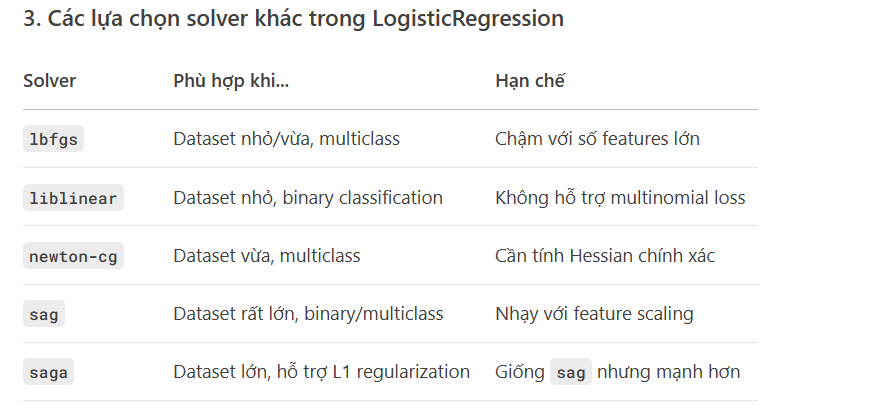

In [ ]:
from sklearn.linear_model import LogisticRegression
# LogisticRegression cho bài toán phân loại đa lớp
lr_model = LogisticRegression(
    solver='lbfgs',             # lbfgs/newton-cg/sag/saga hỗ trợ multinomial
    max_iter =1000
)
lr_model = train(X_train, y_train, lr_model)

#### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators = 100,
    max_depth = 10,
    min_samples_split = 5,
    min_samples_leaf = 2,
    random_state = 42
)
rf_model = train(X_train, y_train, rf_model)

## Bước 6: Đánh giá mô hình

### Đánh giá mô hình SVM

In [ ]:
def eva(X_test, model):
    y_pred = model.predict(X_test)
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

    print('-'*100)
    print(classification_report(y_test, y_pred))

#eva(X_test, svm)

### Đánh giá mô hình hồi quy Logistic

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

def eva(X_test, y_test, model):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
    print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
eva(X_test, y_test, lr_model)

Accuracy: 0.5
F1 Score: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Đánh giá mô hình RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

def eva(X_test, y_test, model):
    y_pred = model.predict(X_test)
    print("✅ Đánh giá mô hình:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
    print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
eva(X_test, y_test, rf_model)

✅ Đánh giá mô hình:
Accuracy: 0.0
F1 Score: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

## Bước 7: Tối ưu Model

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np

# ✅ Định nghĩa model
svm = LinearSVC()

# ✅ Tham số cần tune
param_grid = {
    'C': [0.1, 0.2, 0.5, 1.0, 2.0, 3.0]
}

# ✅ Tự động xác định số fold an toàn nhất
# Đếm số lượng mẫu ít nhất trong mỗi class
_, class_counts = np.unique(y_train, return_counts=True)
min_samples_per_class = np.min(class_counts)

# Số fold không được lớn hơn số mẫu ít nhất
max_valid_splits = min(5, min_samples_per_class)
if max_valid_splits < 2:
    max_valid_splits = 2  # tránh lỗi khi chỉ còn 1 mẫu

skf = StratifiedKFold(n_splits=max_valid_splits, shuffle=True, random_state=42)

# ✅ GridSearch
grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=skf,
    scoring='f1_macro',
    n_jobs=-1
)

print("🔍 Đang thực hiện tìm kiếm tham số tốt nhất...")
grid.fit(X_train, y_train)

# ✅ In kết quả
print("✅ Best Params:", grid.best_params_)
print("✅ Best Score:", grid.best_score_)

# ✅ Model tốt nhất
best_model = grid.best_estimator_

# ✅ Hàm đánh giá
def eva(X, model):
    y_pred = model.predict(X)
    print(classification_report(y_test, y_pred))

# ✅ Gọi đánh giá
eva(X_test, best_model)


🔍 Đang thực hiện tìm kiếm tham số tốt nhất...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


✅ Best Params: {'C': 0.1}
✅ Best Score: nan
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py", line 321, in fit
    self.coef_, self.intercept_, n_iter

## Bước 8: Xây dựng Pipeline

### ✅ Lý thuyết cơ bản

#### a. Kế thừa BaseEstimator và TransformerMixin

✅ Tóm tắt đúng và đầy đủ:
1. BaseEstimator → Kế thừa các thuộc tính và hành vi chuẩn hóa của đối tượng trong Scikit-learn:
Cung cấp tự động:

get_params()

set_params()

👉 Giúp tích hợp tốt với GridSearchCV, Pipeline, clone(), v.v.

➤ Nên nghĩ: BaseEstimator = phần khung chuẩn của Sklearn (cho mọi mô hình hoặc transformer)

2. TransformerMixin → Cung cấp sẵn fit_transform() nếu bạn đã có:
fit()

transform()

👉 Giúp bạn không cần tự định nghĩa fit_transform() lặp lại.

➤ Nên nghĩ: TransformerMixin = hỗ trợ dành riêng cho Transformer (bước xử lý dữ liệu)

### ✅ 1. Import thư viện

In [ ]:
!pip install underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.0 MB/s eta 0:00:00


In [ ]:
from underthesea import word_tokenize

### ✅2. Custom cleaner

In [ ]:
class TextCleaner(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return [self.clean_text(text) for text in X]

    def clean_text(self, text):
        text = str(text).lower() # Chuyển thành chữ thường
        # Xóa URL
        text = re.sub(r"http\S+" ,"", text)

        # Xóa @mention
        text = re.sub(r"@\S+", "", text)

        # Xóa hashtag
        text = re.sub(r"#\S+", "", text)

        # replace_teencode
        text = replace_teencode(text, teencode_dict)

        # Xóa ký tự số
        text = re.sub(r"\d+", "", text)

        # Xóa ký tự đặc biệt
        text = re.sub(r"[^\w\s]", "", text)

        # Chuẩn hóa khoảng trắng
        text = re.sub(r"\s+"," ", text).strip()

        return text

### ✅ 3. Word segmentation (Underthesea)

In [ ]:
class WordSegmenter(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [word_tokenize(text, format='text') for text in X]

### ✅ 4. Remove stopwords

In [ ]:
class StopwordRemover(BaseEstimator, TransformerMixin):
    def __init__(self, stopwords):
        self.stopwords = stopwords

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [' '.join([word for word in text.split() if word not in self.stopwords]) for text in X]

# Danh sách stopword cơ bản
stopwords = ['là', 'của', 'và', 'có', 'trong', 'một', 'những', 'được', 'với']

### ✅ 5. TF-IDF vectorizer

In [ ]:
tfidf = TfidfVectorizer(
    analyzer='word',
    ngram_range=(1, 3),
    max_features=15000,
    min_df=5,
    max_df=0.85
)


### ✅6. Classifier

In [ ]:
#svm = LinearSVC(C=1.0)
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(
    C=1.0,
    max_iter=1000,
    solver='liblinear'  # hoặc 'saga' nếu dữ liệu lớn hơn
)

### ✅7. Xây dựng pipeline

In [ ]:
pipeline = Pipeline([
    ('cleaner', TextCleaner()),
    ('segmenter', WordSegmenter()),
    ('stopword_removal', StopwordRemover(stopwords=stopwords)),
    ('vectorizer', tfidf),
    #('classifier', svm)
    ('classifier', clf)
])

### ✅8. Huấn luyện và đánh giá

#### Tải lại dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

file_path = '/content/drive/MyDrive/Bản sao của Lộ trình try hard.pdf'
print("Tồn tại file:", os.path.exists(file_path))

Tồn tại file: True


In [ ]:
import fitz  # PyMuPDF
import pandas as pd

file_path = '/content/drive/MyDrive/Bản sao của Lộ trình try hard.pdf'

def read_pdf(file_path):
    doc = fitz.open(file_path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text

# Đọc toàn bộ nội dung
pdf_text = read_pdf(file_path)

# Tạo dataframe từ nội dung PDF (giả sử mỗi dòng là một văn bản)
lines = [line.strip() for line in pdf_text.split('\n') if line.strip()]
data_update = pd.DataFrame({'text': lines})

print(data_update.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    129 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB
None


#### Phân loại 3 lớp

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# 🔹 Giả sử bạn đã có data_update là một DataFrame với 2 cột: 'comments' và 'flag'
# Ví dụ giả lập:
data_update = pd.DataFrame({
    'comments': [
        "Sản phẩm tốt",
        "Không hài lòng",
        "Mình thích nó",
        "Tệ quá",
        "Quá xuất sắc",
        "Không đáng tiền"
    ],
    'flag': [1, 0, 1, 0, 1, 0]
})

# 🔹 Gán X và y
X = data_update['comments']
y = data_update['flag']

# 🔹 Tách tập train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# 🔹 Xây dựng pipeline đơn giản: TfidfVectorizer + LinearSVC
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())
])

# 🔹 Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# 🔹 Dự đoán
y_pred = pipeline.predict(X_test)

# 🔹 Đánh giá
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('-' * 100)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1 0]
 [1 0]]
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])
print("Label distribution (y_test):", y_test.value_counts())

Train size: 4
Test size: 2
Label distribution (y_test): flag
1    1
0    1
Name: count, dtype: int64


In [ ]:
flag_data = (data_update['flag'] == 0) | (data_update['flag'] == 2)

data_update = data_update[flag_data].copy()

data_update['flag'] = data_update['flag'].map({
    0:0,
    2:1
})
print(data_update['flag'].value_counts())

X = data_update['comments']
y = data_update['flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

print(y_train.value_counts())

flag
0    3
Name: count, dtype: int64
flag
0    2
Name: count, dtype: int64


#### Phân loại 2 lớp

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# 🔹 Ví dụ dữ liệu mẫu nếu bạn chưa có sẵn:
# Nếu đã có data_update thì bỏ đoạn này
data_update = pd.DataFrame({
    'comments': [
        "Tôi không hài lòng",
        "Tuyệt vời",
        "Không đáng tiền",
        "Xuất sắc",
        "Rất tệ",
        "Tốt lắm"
    ],
    'flag': [0, 2, 0, 2, 0, 2]  # Chỉ chứa 0 và 2
})

# 🔹 Lọc các nhãn chỉ giữ lại 0 và 2
flag_data = (data_update['flag'] == 0) | (data_update['flag'] == 2)
data_update = data_update[flag_data].copy()

# 🔹 Đổi nhãn: 0 → -1, 2 → 1
data_update['flag'] = data_update['flag'].map({0: -1, 2: 1})

# 🔹 Tách X và y
X = data_update['comments']
y = data_update['flag']

# 🔹 Tách tập train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# 🔹 Tạo pipeline đơn giản
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())  # Bạn có thể thay bằng SVC(kernel='linear') nếu muốn
])

# 🔹 Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# 🔹 Dự đoán
y_pred = pipeline.predict(X_test)

# 🔹 Đánh giá
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("-" * 100)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[0 1]
 [0 1]]
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### ✅9. Self - Training

#### Xây dựng bộ dữ liệu ban đầu

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Giả sử data_update đã có sẵn (bạn cần nạp đúng dữ liệu)

# 🔹 Bước 1: Đảm bảo flag là số nguyên
data_update['flag'] = pd.to_numeric(data_update['flag'], errors='coerce')

# 🔹 Bước 2: Chỉ lấy nhãn 0 và 2
mask_labeled = (data_update['flag'] == 0) | (data_update['flag'] == 2)
data_update_1 = data_update[mask_labeled].copy()

# 🔹 Bước 3: Kiểm tra số lượng
print("Số dòng có flag là 0 hoặc 2:", len(data_update_1))
print(data_update_1['flag'].value_counts())

# 🔹 Nếu không có dòng nào thì dừng lại
if len(data_update_1) == 0:
    print("❌ Không có dữ liệu để train. Kiểm tra lại cột 'flag'.")
else:
    # Chuyển nhãn
    data_update_1['flag'] = data_update_1['flag'].map({0: -1, 2: 1})

    # Chuẩn bị dữ liệu
    X = data_update_1['comments']
    y = data_update_1['flag']

    # Dữ liệu chưa gán nhãn
    data_unlabeled = data_update[data_update['flag'] == 1].copy()
    X_unlabeled = data_unlabeled['comments']

    # Tách train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, stratify=y, random_state=42
    )

    # Gộp dữ liệu chưa gán nhãn
    unlabeled_data = pd.concat([X_test, X_unlabeled], ignore_index=True)

    print("✅ Tạo tập unlabeled_data thành công:")
    print(unlabeled_data.info())


Số dòng có flag là 0 hoặc 2: 0
Series([], Name: count, dtype: int64)
❌ Không có dữ liệu để train. Kiểm tra lại cột 'flag'.


#### Huấn luyện

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# ⚠️ Giả sử pipeline đã được định nghĩa từ trước

# Hàm đánh giá model
def eval_model(y_true, y_pred):
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

# ✅ Hàm self-training
def self_train(X_train, y_train, X_test, y_test, unlabeled_data, X, y, threshold=0.99, max_iter=20):
    count = 0

    while len(unlabeled_data) > 0:
        count += 1

        # Huấn luyện mô hình trên tập hiện tại
        pipeline.fit(X_train, y_train)

        # Dự đoán và đánh giá
        y_pred = pipeline.predict(X_test)
        print(f"\n📘 Vòng lặp {count}")
        print("-" * 100)
        eval_model(y_test, y_pred)

        # Dự đoán xác suất cho dữ liệu chưa gán nhãn
        probs = pipeline.predict_proba(unlabeled_data)
        preds = pipeline.predict(unlabeled_data)
        confidences = np.max(probs, axis=1)

        # Dừng nếu không còn mẫu đủ tin cậy
        if np.max(confidences) < threshold:
            print("❌ Không còn mẫu nào đủ độ tin cậy.")
            break

        # Chọn chỉ số mẫu có độ tin cậy cao
        confident_idxs = np.where(confidences >= threshold)[0]

        if len(confident_idxs) == 0:
            print("❌ Không có mẫu tin cậy trong vòng này.")
            break

        # Nếu quá nhiều, chỉ lấy tối đa 5000 mẫu tự tin nhất
        if len(confident_idxs) > 5000:
            top_confidences = confidences[confident_idxs]
            top_5000_local = np.argsort(top_confidences)[-5000:]
            top_idxs = confident_idxs[top_5000_local]
        else:
            top_idxs = confident_idxs

        # Lấy comment và nhãn pseudo từ top_idxs
        X_pseudo = unlabeled_data.iloc[top_idxs]
        y_pseudo = preds[top_idxs]

        # Gộp vào dữ liệu ban đầu
        X = pd.concat([X, X_pseudo])
        y = np.concatenate([y, y_pseudo])

        # Chia lại train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.25, stratify=y, random_state=42
        )

        # Xóa các dòng đã chọn khỏi unlabeled
        unlabeled_data = unlabeled_data.drop(index=unlabeled_data.index[top_idxs])

        # In thông tin vòng này
        print(f"[+] Thêm {len(top_idxs)} mẫu vào tập huấn luyện.")
        print(f"🔍 Độ tin cậy trung bình: {confidences[top_idxs].mean():.4f}")

        if count >= max_iter:
            print(f"⏹️ Dừng sau {max_iter} vòng lặp.")
            break

    return X_train, X_test, y_train, y_test, X, y, unlabeled_data


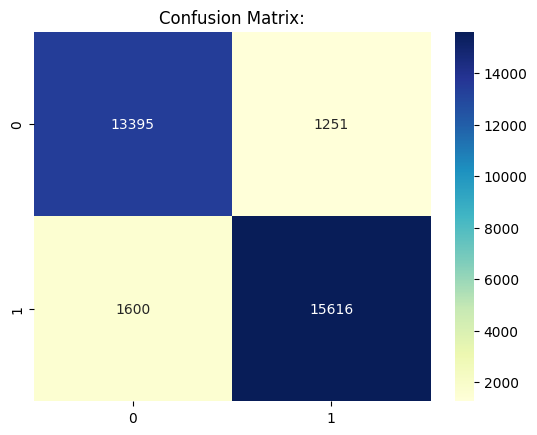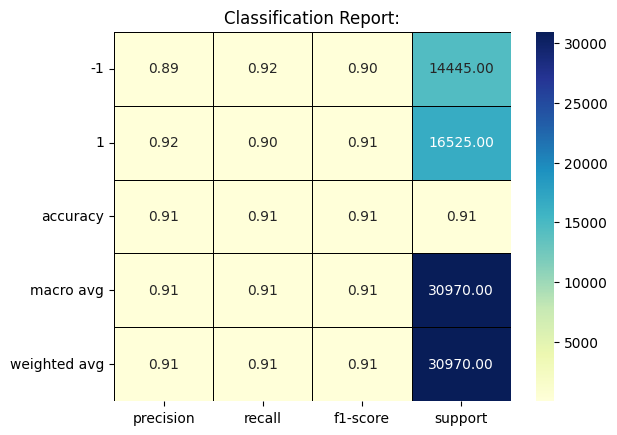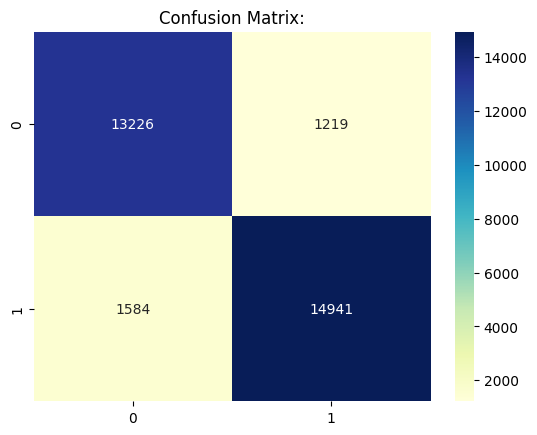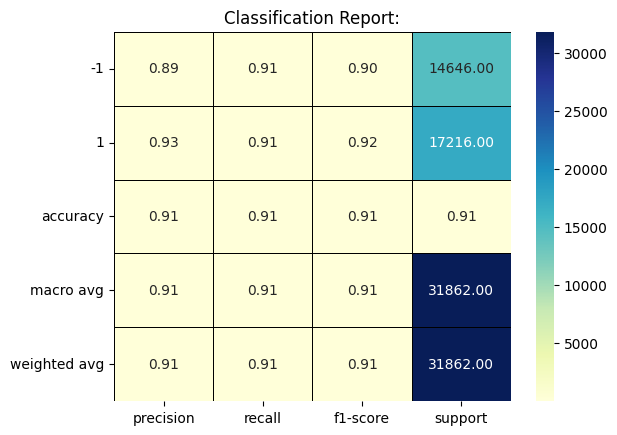

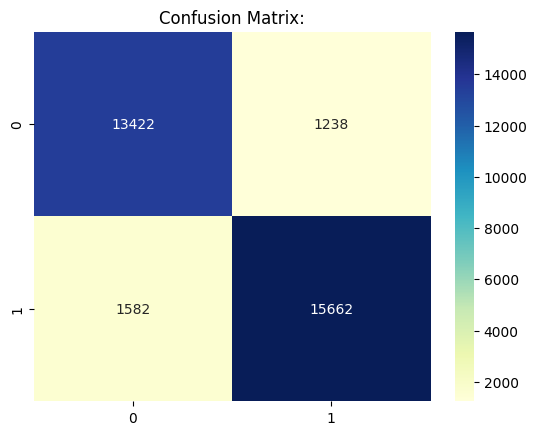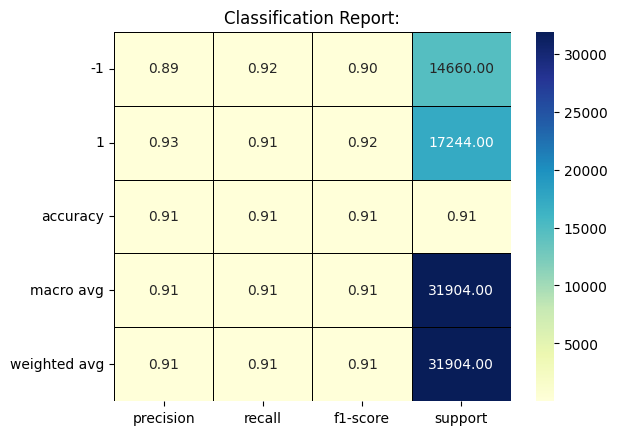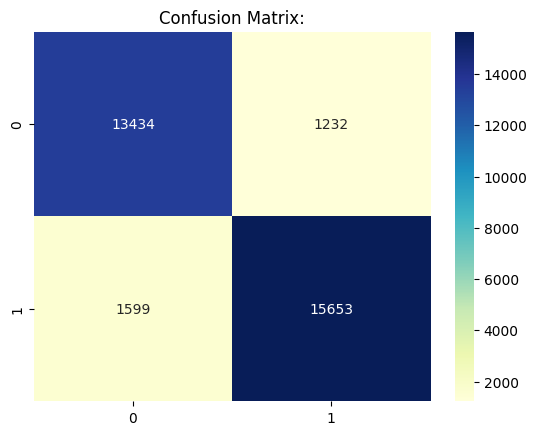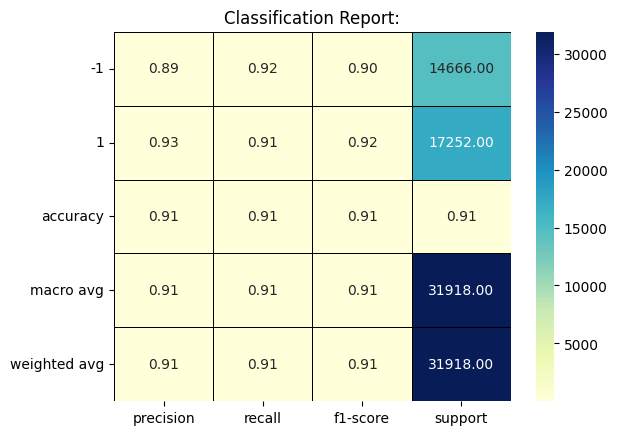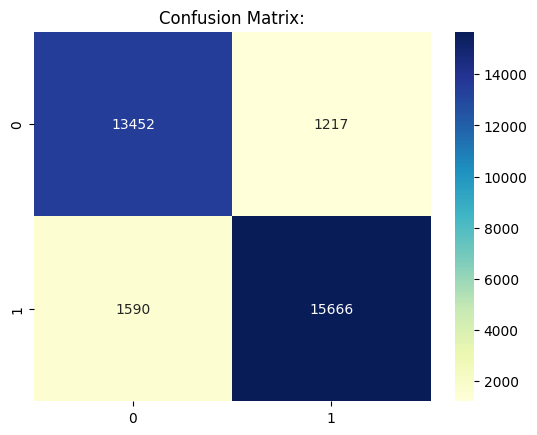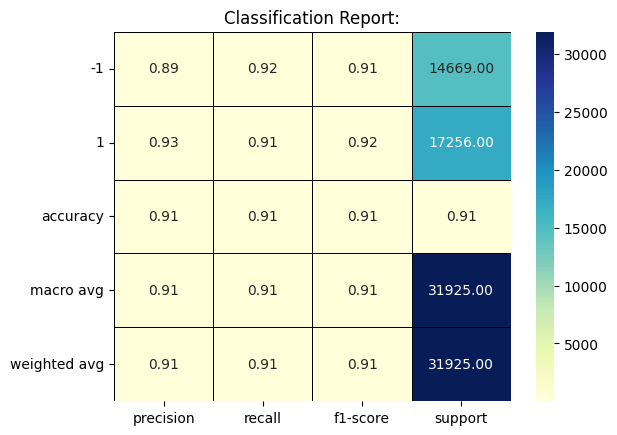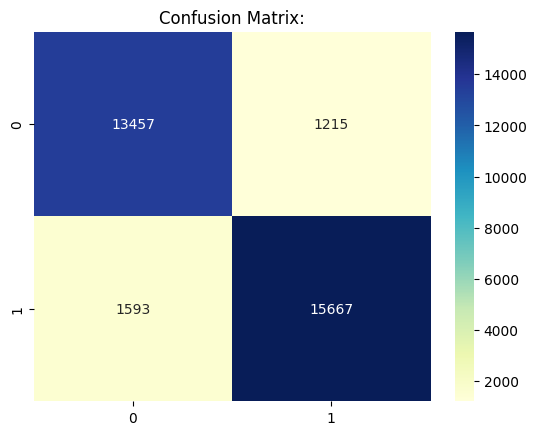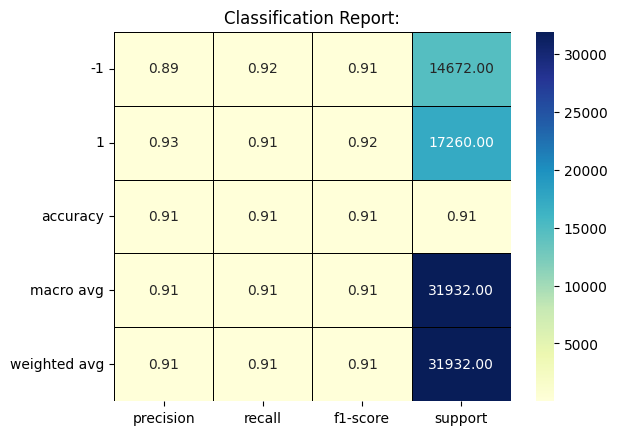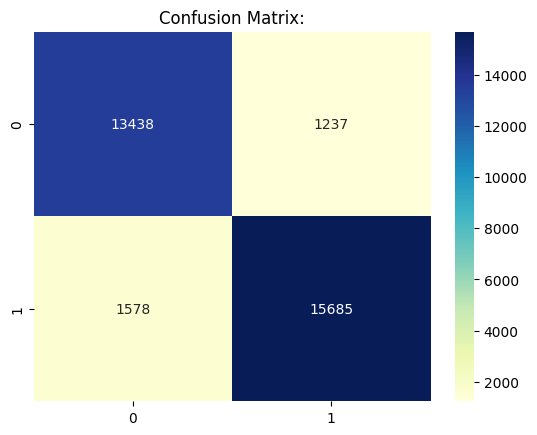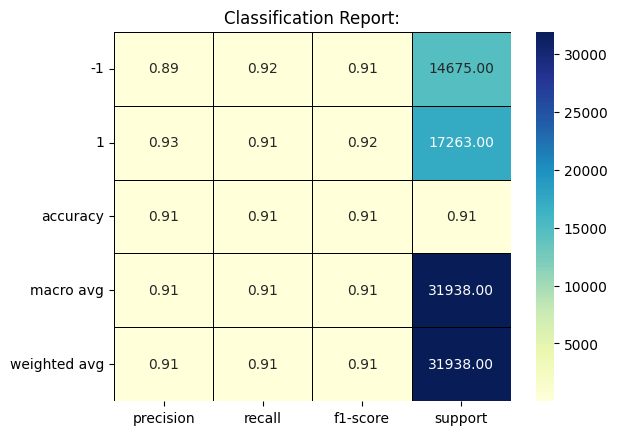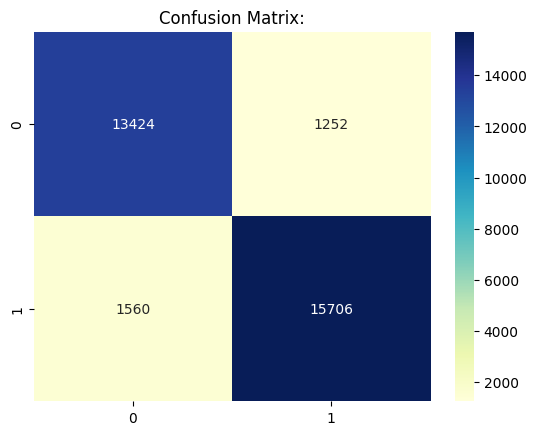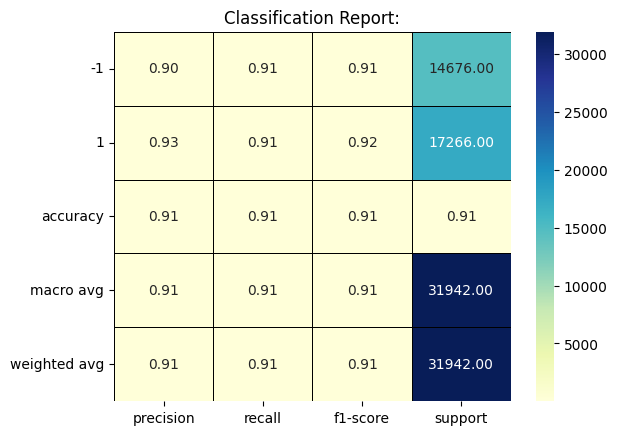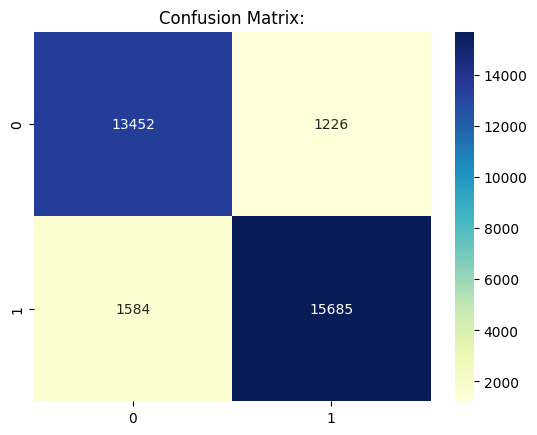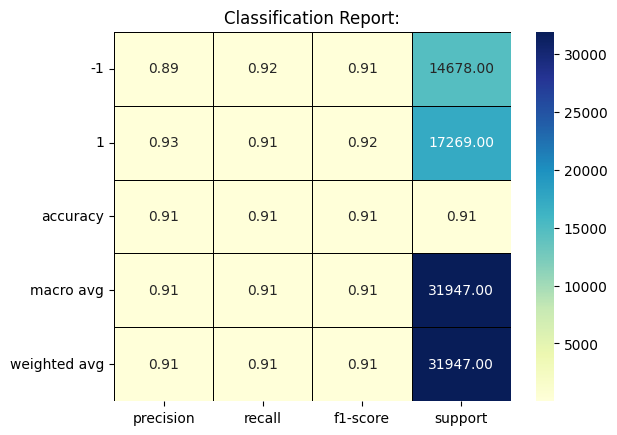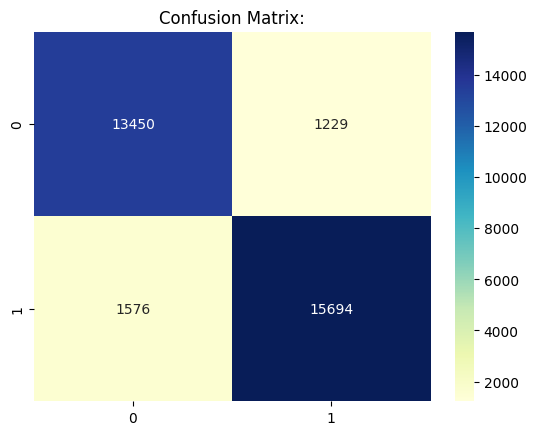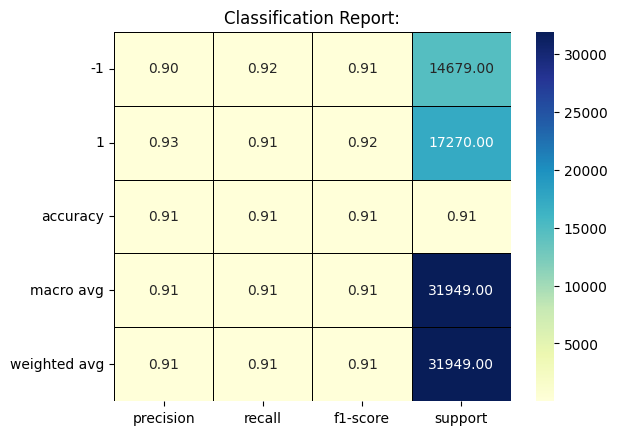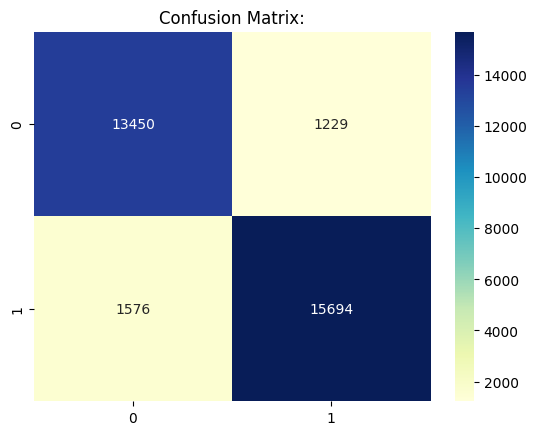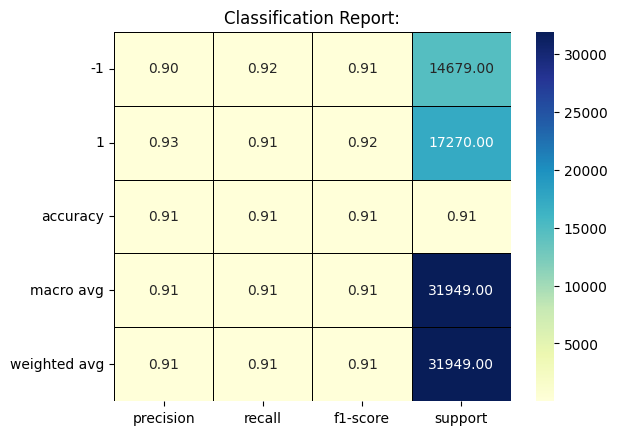

#### Đánh giá mô hình

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def eval_model(y_test, y_pred):
    # Đánh giá
    #print('Confusion Matrix:')
    confusion_ = confusion_matrix(y_test, y_pred)
    sns.heatmap(
        confusion_,
        annot=True,
        fmt="d",
        cmap="YlGnBu"
      )
    plt.title("Confusion Matrix:")
    plt.show()

    print('-'*100)
    #print("Classification Report:")
    cl_r = classification_report(y_test, y_pred, output_dict = True)
    df_report = pd.DataFrame(cl_r).transpose()
    sns.heatmap(
        df_report,
        annot=True,
        linecolor = 'black',
        linewidth = 0.5,
        fmt=".2f",
        cmap="YlGnBu"
    )
    plt.title("Classification Report:")
    plt.show()


#### Tạo bộ dữ liệu mới

In [ ]:
# ⚠️ Chỉ dùng để test nếu chưa có dữ liệu thực tế:
# Giả sử bạn gán thử 100 dòng đầu là "flag = 0", 100 dòng tiếp theo là "flag = 2"
data_update = data_update.copy()
data_update.loc[:99, 'flag'] = 0
data_update.loc[100:199, 'flag'] = 2


In [ ]:
flag_data = (data_update['flag'] == 0) | (data_update['flag'] == 2)
data_update_1 = data_update[flag_data].copy()
data_update_1['flag'] = data_update_1['flag'].map({0: -1, 2: 1})

X = data_update_1['comments']
y = data_update_1['flag']

Data_unlabeled = data_update[data_update['flag'] == 1].copy()
X_unlabeled = Data_unlabeled['comments']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)


#### Tải dữ liệu về

In [ ]:
import pandas as pd

# Đây là ví dụ tạo một DataFrame giả nếu bạn chưa có df_final
df_final = pd.DataFrame({
    "Câu hỏi": ["Câu 1", "Câu 2", "Câu 3"],
    "Nhãn": ["Yes", "No", "Maybe"]
})


In [ ]:
from fpdf import FPDF
from google.colab import files
import pandas as pd
import os
import urllib.request

# ✅ Tạo dữ liệu mẫu nếu chưa có df_final
try:
    df_final
except NameError:
    df_final = pd.DataFrame({
        "Câu hỏi": ["Bạn tên gì?", "Bạn học ngành gì?", "Bạn thích gì?"],
        "Nhãn": ["Tên", "Ngành học", "Sở thích"]
    })

# ✅ Tải font Unicode có hỗ trợ tiếng Việt (Noticia Text)
font_url = "https://github.com/google/fonts/raw/main/ofl/noticiatext/NoticiaText-Regular.ttf"
font_path = "/content/NoticiaText-Regular.ttf"
if not os.path.exists(font_path):
    urllib.request.urlretrieve(font_url, font_path)

# ✅ Tạo PDF và thêm font TRƯỚC KHI add_page()
class PDF(FPDF):
    def header(self):
        self.set_font("Noticia", "B", 12)
        self.cell(0, 10, "Final Labeled Data", ln=True, align="C")

    def chapter_body(self, data):
        self.set_font("Noticia", "", 10)
        for row in data:
            row_str = " | ".join(str(item) for item in row)
            self.multi_cell(0, 10, row_str)

pdf = PDF()
pdf.add_font("Noticia", "", font_path, uni=True)
pdf.add_font("Noticia", "B", font_path, uni=True)
pdf.add_page()  # ✅ Chỉ gọi add_page() sau khi add_font()

pdf.set_auto_page_break(auto=True, margin=15)

# ✅ Ghi dữ liệu
column_names = df_final.columns.tolist()
data_rows = [column_names] + df_final.values.tolist()
pdf.chapter_body(data_rows)

# ✅ Xuất file
pdf_file = "final_labeled_data.pdf"
pdf.output(pdf_file)
files.download(pdf_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Bước 9: semi-supervised learning p1

Dùng model huấn luyện trên bộ dữ liệu có nhãn,
→ dự đoán trên bộ dữ liệu không nhãn hoặc nhãn không chắc chắn
→ chọn các mẫu dự đoán với độ tự tin cao (confidence cao)
→ gán nhãn giả (pseudo-label)
→ thêm vào tập huấn luyện
→ huấn luyện lại model.

### Chia tập huấn luyện và train

#### Ý tưởng chính:

"""
    So sánh proba với threshold(ngưỡng mà tôi coi là an toàn)
    Lấy những thằng có xác suất lớn hơn threshold này -> cho vào 1 data_new
    (ý tưởng: lấy index (idx), sau đó, tạo cột mới và thêm data đó vào
    ví dụ: data_new = df[idx]
    )
    -> Ta sẽ thu được 1 data_new chứa những dữ liệu có độ tin cậy cao hơn
    -> Sau đó sẽ lấy bộ data_new này, kết hợp với data_mẫu
    -> thu được 1 data_sum chứa dữ liệu thực (sai chính tả, teencode,...) được dán nhãn chuẩn hơn ban đầu
    với dữ liệu văn mẫu
    -> Đi check kỹ bộ dữ liệu này
      => Xây dựng lại bộ stopword nhỏ (tự xây)
      => Xây dựng thêm cơ chế sửa lỗi chính tả, không dấu, viết tắt
    -> Thu được 1 bộ dữ liệu khá real và bộ stopword + sửa lỗi chính tả đi kèm
    -> Huấn luyện lại và có thể thu nhập thêm dữ liệu tin cậy từ tập data_real để tăng cường chất lượng bộ dữ liệu dần dần.
    -> Khi đạt được 1 mức nhất định, ta đi đánh giá mô hình. Khi đủ tốt sẽ deploy,...
    """

#### Code

In [ ]:
from fpdf import FPDF
from google.colab import files
import urllib.request
import os

# ✅ Kiểm tra nếu chưa có data_sum thì tạo dữ liệu mẫu
try:
    data_sum
except NameError:
    import pandas as pd
    data_sum = pd.DataFrame({
        "comments": ["Bạn tên gì?", "Bạn học ngành gì?", "Bạn thích gì?"],
        "flag": ["Tên", "Ngành học", "Sở thích"]
    })

# ✅ Tải font hỗ trợ tiếng Việt
font_url = "https://github.com/google/fonts/raw/main/ofl/noticiatext/NoticiaText-Regular.ttf"
font_path = "/content/NoticiaText-Regular.ttf"
if not os.path.exists(font_path):
    urllib.request.urlretrieve(font_url, font_path)

# ✅ Định nghĩa class PDF có hỗ trợ tiếng Việt
class PDF(FPDF):
    def header(self):
        self.set_font("Noticia", "B", 12)
        self.cell(0, 10, "Tập dữ liệu tổng hợp (data_sum)", ln=True, align="C")

    def chapter_body(self, data):
        self.set_font("Noticia", "", 10)
        for row in data:
            row_str = " | ".join(str(item) for item in row)
            self.multi_cell(0, 10, row_str)

# ✅ Tạo PDF
pdf = PDF()
pdf.add_font("Noticia", "", font_path, uni=True)
pdf.add_font("Noticia", "B", font_path, uni=True)
pdf.add_page()
pdf.set_auto_page_break(auto=True, margin=15)

# ✅ Ghi dữ liệu
column_names = data_sum.columns.tolist()
data_rows = [column_names] + data_sum.values.tolist()
pdf.chapter_body(data_rows)

# ✅ Xuất file
pdf_file = "data_sum.pdf"
pdf.output(pdf_file)
files.download(pdf_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Test thao tác

#### Huấn luyện với SVM

In [ ]:
data = {
    'comments': [
        "Bài viết rất hay",
        "Không liên quan đến chủ đề",
        "Thông tin hữu ích",
        "Spam và quảng cáo",
        "Chia sẻ có giá trị"
    ],
    'flag': [1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)


#### Huấn luyện LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.4, random_state=42, stratify=y
)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(
    C=1.0,
    max_iter=1000,
    solver='liblinear'  # Hoặc 'saga' nếu data lớn
)

clf.fit(X_train, y_train)  # Đã chia xong ở bước trước


LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
proba = clf.predict_proba(X_test)

In [ ]:
from IPython.display import display
display(proba)

array([[0.44234928, 0.55765072],
       [0.44234928, 0.55765072]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

def eva(X_test, y_test, model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

def sef_train(n_splits, shuffle, threshold, X, y, df, X_test, y_test):
    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=shuffle,
        random_state=42
    )
    confidence_threshold = threshold
    data_new_list = []

    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        clf = LogisticRegression(
            C=1.0,
            max_iter=1000,
            class_weight='balanced',
            solver='saga'
        )
        clf.fit(X_train, y_train)

        proba = clf.predict_proba(X_val)
        max_proba = np.max(proba, axis=1)

        pseudo_labels = clf.predict(X_val)

        high_confidence_idx = np.where(max_proba >= confidence_threshold)[0]
        selected_idx = val_idx[high_confidence_idx]

        df_selected = df.iloc[selected_idx].copy()
        df_selected['pseudo_label'] = pseudo_labels[high_confidence_idx]

        # Chỉ chọn mẫu dự đoán đúng
        df_selected = df_selected[df_selected['pseudo_label'] == df_selected['flag']]

        data_new_list.append(df_selected)

        eva(X_test, y_test, clf)

    data_new = pd.concat(data_new_list, ignore_index=True)
    data_new = data_new.rename(columns={'pseudo_label': 'new_flag'})
    data_new.to_csv("data_new.csv", index=False, encoding='utf-8-sig')

    print("✅ Số mẫu real-pseudo-label:", len(data_new))

    return data_new


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from fpdf import FPDF
import numpy as np
import pandas as pd

def sef_train(n_splits, shuffle, threshold, X, y, df, X_test):
    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=shuffle,
        random_state=42
    )
    confidence_threshold = threshold
    data_new_list = []

    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        clf = LogisticRegression(
            C=1.0,
            max_iter=1000,
            class_weight='balanced',
            solver='saga'
        )
        clf.fit(X_train, y_train)

        proba = clf.predict_proba(X_val)
        max_proba = np.max(proba, axis=1)
        pseudo_labels = clf.predict(X_val)

        high_confidence_idx = np.where(max_proba >= confidence_threshold)[0]
        selected_idx = val_idx[high_confidence_idx]
        df_selected = df.iloc[selected_idx].copy()
        df_selected['pseudo_label'] = pseudo_labels[high_confidence_idx]

        df_selected = df_selected[df_selected['pseudo_label'] == df_selected['flag']]
        data_new_list.append(df_selected)

        # Nếu có hàm eva thì gọi
        # eva(X_test, clf)

    data_new = pd.concat(data_new_list, ignore_index=True)
    data_new = data_new.rename(columns={'pseudo_label': 'new_flag'})

    # Ghi PDF thay vì CSV
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=10)

    col_width = pdf.w / (len(data_new.columns) + 1)
    row_height = 8

    # Ghi tiêu đề cột
    for col in data_new.columns:
        pdf.cell(col_width, row_height, txt=str(col), border=1)
    pdf.ln(row_height)

    # Ghi nội dung (giới hạn 100 dòng đầu)
    for i, row in data_new.head(100).iterrows():
        for item in row:
            pdf.cell(col_width, row_height, txt=str(item), border=1)
        pdf.ln(row_height)

    pdf.output("data_new.pdf")
    print("✅ Đã tạo file PDF: data_new.pdf")
    print("✅ Số mẫu real-pseudo-label:", len(data_new))

    return data_new

In [ ]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.9 MB/s eta 0:00:00


In [ ]:
!pip install reportlab

import pandas as pd
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from google.colab import files

# Dữ liệu mẫu (hoặc thay bằng `data_new`)
data = {
    'Tên': ['Minh', 'An', 'Huy'],
    'Tuổi': [20, 22, 21],
    'Lớp': ['A1', 'B2', 'C3']
}
df = pd.DataFrame(data)

# Hàm lưu DataFrame thành PDF
def save_dataframe_to_pdf(df, filename='data_new.pdf'):
    c = canvas.Canvas(filename, pagesize=letter)
    width, height = letter

    text = c.beginText(40, height - 50)
    text.setFont("Helvetica", 12)

    lines = [", ".join(df.columns)] + [", ".join(map(str, row)) for row in df.values]
    for line in lines:
        text.textLine(line)

    c.drawText(text)
    c.save()

# Lưu và tải file PDF
save_dataframe_to_pdf(df, 'data_new.pdf')
files.download('data_new.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pdfplumber

with pdfplumber.open('data_new.pdf') as pdf:
    for page_num, page in enumerate(pdf.pages, 1):
        text = page.extract_text()
        print(f"\n📄 Page {page_num}:\n{text}")


📄 Page 1:
Tên, Tuni, Lnp
Minh, 20, A1
An, 22, B2
Huy, 21, C3


In [ ]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=ed45f5055835a3367ab11ef97958869977a4eb48131f446f1e3674bd0513984e
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [ ]:
!pip install fpdf2
!wget https://github.com/dejavu-fonts/dejavu-fonts/raw/master/ttf/DejaVuSans.ttf -O DejaVuSans.ttf

--2025-06-18 05:58:56--  https://github.com/dejavu-fonts/dejavu-fonts/raw/master/ttf/DejaVuSans.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-06-18 05:58:56 ERROR 404: Not Found.



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from fpdf import FPDF
from google.colab import files

def sef_train(n_splits, shuffle, threshold, X, y, df, X_test):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=shuffle, random_state=42)
    confidence_threshold = threshold
    data_new_list = []

    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        clf = LogisticRegression(
            C=1.0, max_iter=1000, class_weight='balanced', solver='saga'
        )
        clf.fit(X_train, y_train)

        proba = clf.predict_proba(X_val)
        max_proba = np.max(proba, axis=1)
        pseudo_labels = clf.predict(X_val)
        high_confidence_idx = np.where(max_proba >= confidence_threshold)[0]
        selected_idx = val_idx[high_confidence_idx]

        df_selected = df.iloc[selected_idx].copy()
        df_selected['pseudo_label'] = pseudo_labels[high_confidence_idx]
        df_selected = df_selected[df_selected['pseudo_label'] == df_selected['flag']]
        data_new_list.append(df_selected)

        # Nếu bạn có hàm đánh giá, gọi ở đây
        eva(X_test, clf)

    data_new = pd.concat(data_new_list, ignore_index=True)
    data_new = data_new.rename(columns={'pseudo_label': 'new_flag'})
    data_new.to_csv("data_new.csv", index=False, encoding='utf-8-sig')
    print("✅ Số mẫu real-pseudo-label:", len(data_new))

    # Tạo PDF
    pdf = FPDF()
    pdf.add_page()
    pdf.add_font("DejaVu", "", "DejaVuSans.ttf", uni=True)
    pdf.set_font("DejaVu", "", 10)

    pdf.set_font("DejaVu", 'B', 12)
    pdf.cell(200, 10, txt="Báo cáo dữ liệu từ data_new", ln=True, align='C')
    pdf.ln(10)

    pdf.set_font("DejaVu", '', 10)
    flag_counts = data_new['flag'].value_counts().to_dict()
    new_flag_counts = data_new['new_flag'].value_counts().to_dict()
    pdf.cell(200, 10, txt=f"Số lượng theo flag: {flag_counts}", ln=True)
    pdf.cell(200, 10, txt=f"Số lượng theo new_flag: {new_flag_counts}", ln=True)
    pdf.ln(10)

    pdf.set_font("DejaVu", 'B', 11)
    pdf.cell(200, 10, txt="Top 20 dòng có flag == 1", ln=True)
    pdf.set_font("DejaVu", size=8)

    df_flag1 = data_new[data_new['flag'] == 1].head(20)
    for idx, row in df_flag1.iterrows():
        text = ', '.join(f"{col}: {str(row[col])}" for col in data_new.columns)
        pdf.multi_cell(0, 6, txt=text)
        pdf.ln(1)

    pdf.output("data_new.pdf")
    files.download("data_new.pdf")

    return data_new

## Bước 10: semi-supervised learning p2

### Huấn luyện mô hình

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Tạo bộ dữ liệu mẫu
X, y = make_classification(n_samples=100, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Đánh giá mô hình

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def eva(X_test, model, y_test):
    y_pred = model.predict(X_test)

    print("📌 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\n📊 Classification Report:")
    print(classification_report(y_test, y_pred))

    print(f"\n✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def eval_model(y_true, y_pred):
    print("📌 Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    print("\n📊 Classification Report:")
    print(classification_report(y_true, y_pred))

    print(f"\n✅ Accuracy: {accuracy_score(y_true, y_pred):.4f}")

### Dự đoán nhãn bằng 1 mô hình binary

In [ ]:
import pandas as pd

In [ ]:
df_1 = pd.DataFrame({
    'clean': ["text 1", "text 2", "text 3"],
    'label': [0, 1, 0]
})

In [ ]:
index_map = df_1.index.values
print(index_map)

[0 1 2]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from IPython.display import display

# 1. Tạo dữ liệu mẫu
df_1 = pd.DataFrame({
    'clean': ["tôi yêu học máy", "lập trình là cuộc sống", "học Python rất thú vị", "tôi ghét toán rời rạc", "môn học nhàm chán"],
    'label': [1, 1, 1, 0, 0]
})
index_map = df_1.index.values  # lưu lại index gốc

# 2. TF-IDF
vectorizer = TfidfVectorizer()
X_all = vectorizer.fit_transform(df_1['clean'])

# 3. Train model
clf = LogisticRegression(max_iter=1000, solver='liblinear')
clf.fit(X_all, df_1['label'])

# 4. Tạo dữ liệu test (dùng chính X_all để demo)
X_test_1 = X_all

# 5. Hàm dự đoán với ngưỡng
def predict_b(X_test_1, model, df_1, index_map, threshold = 0.9):
    proba = model.predict_proba(X_test_1)

    idx_0 = np.where(proba[:, 0] > (threshold+0.09))[0]
    idx_1 = np.where(proba[:, 1] > threshold)[0]

    # Map lại index gốc
    df_idx_0 = index_map[idx_0]
    df_idx_1 = index_map[idx_1]

    # Trích mẫu
    data_0 = df_1.loc[df_idx_0].copy()
    data_0['label'] = 0

    data_1 = df_1.loc[df_idx_1].copy()
    data_1['label'] = 1

    return data_0, data_1

# 6. Gọi hàm
data_0, data_1 = predict_b(X_test_1, clf, df_1, index_map)

# 7. Hiển thị kết quả
print("📘 Dự đoán là lớp 0:")
display(data_0)
print("-" * 100)
print("📗 Dự đoán là lớp 1:")
display(data_1)

📘 Dự đoán là lớp 0:


,clean,label


----------------------------------------------------------------------------------------------------
📗 Dự đoán là lớp 1:


,clean,label


### Lấy index

In [ ]:
index_0 = data_0.index
index_2 = data_1.index

print(index_0)
print(index_2)

Index([], dtype='int64')
Index([], dtype='int64')


In [ ]:
import pandas as pd

# Ví dụ DataFrame giả lập
df = pd.DataFrame({'clean': ['text'] * 186387})  # tạo 186387 dòng (index từ 0 đến 186386)

# Gán giá trị flag mặc định là 0
df['flag'] = 0

# Gán flag = 1 từ 0 đến 68598
df.loc[0:68598, 'flag'] = 1

# Gán flag = 2 từ 68599 đến A
A = 120000  # thay A bằng giá trị thật nếu bạn có
df.loc[68599:A, 'flag'] = 2

# Gán flag = 0 từ A+1 trở đi (chỉ nếu chưa là 0 rồi)
df.loc[A+1:186386, 'flag'] = 0

# Kiểm tra
print(df['flag'].value_counts())
display(df)

flag
1    68599
0    66386
2    51402
Name: count, dtype: int64


,clean,flag
0,text,1
1,text,1
2,text,1
3,text,1
4,text,1
...,...,...
186382,text,0
186383,text,0
186384,text,0
186385,text,0


In [ ]:
pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 36.9 MB/s eta 0:00:00


In [ ]:
import pdfplumber
import pandas as pd

lines = []

with pdfplumber.open("/content/drive/MyDrive/Bản sao của Lộ trình try hard.pdf") as pdf:
    for page in pdf.pages:
        text = page.extract_text()
        if text:
            for line in text.split('\n'):
                lines.append(line.strip())

# Tạo DataFrame từ từng dòng văn bản
df_update = pd.DataFrame(lines, columns=['content'])

# Hiển thị vài dòng đầu
display(df_update.head(10))

,content
0,Tuần 1: Hồi quy tuyến tính (Linear Regression)
1,✔ Ngày 1: Hồi quy tuyến tính là gì? Giải thích...
2,✔ Ngày 2: Gradient Descent là gì? Cách tìm đườ...
3,✔ Ngày 3: Loss function là gì? Mean Squared Er...
4,✔ Ngày 4: Công thức hồi quy tuyến tính – Phân ...
5,✔ Ngày 5: Tự code Linear Regression từ đầu bằn...
6,Tuần 2: Ứng dụng Linear Regression + Đánh giá ...
7,✔ Ngày 6: Sử dụng scikit-learn để train Linear...
8,"✔ Ngày 7: Đánh giá mô hình hồi quy (MAE, MSE)"
9,"✔ Ngày 8: Đánh giá mô hình hồi quy (R² Score, ..."


In [ ]:
df_update['flag'] = 1  # Gán mặc định ban đầu là 1 cho tất cả

In [ ]:
# Gán lại flag = 0 nếu flag hiện tại là 1 tại index_0
df_update.loc[index_0, 'flag'] = df_update.loc[index_0, 'flag'].map({1: 0})

# Gán lại flag = 2 nếu flag hiện tại là 1 tại index_2
df_update.loc[index_2, 'flag'] = df_update.loc[index_2, 'flag'].map({1: 2})

# Kiểm tra phân bố nhãn sau khi thay đổi
print(df_update['flag'].value_counts())

flag
1    129
Name: count, dtype: int64


In [ ]:
# Cách 1: Sử dụng .loc một lần duy nhất
df_update.loc[index_0, 'flag'] = df_update.loc[index_0, 'flag'].map({
    1 : 0
})

df_update.loc[index_2, 'flag'] = df_update.loc[index_2, 'flag'].map({
    1 : 2
})

print(df_update['flag'].value_counts())



flag
1    129
Name: count, dtype: int64


In [ ]:
# Cách 2: Tạo bản sao rõ ràng trước khi thay đổi
df_update = df_update.copy()

df_update['flag'].loc[index_0] =df_update['flag'].loc[index_0].map({
    1 : 0
})
df_update['flag'].loc[index_2] =df_update['flag'].loc[index_2].map({
    1 : 2
})

print(df_update['flag'].value_counts())

flag
1    129
Name: count, dtype: int64


<ipython-input-25-3027781545>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_update['flag'].loc[index_0] =df_update['flag'].loc[index_0].map({
<ipython-input-25-3027781545>:4: SettingWithCopyWarning: 
A value is trying to be set on a co

### Chuyển data_update sang csv và tải về

In [ ]:
df_update.to_csv(
    'Updated_dulieu_huanluyen.csv',
    index = False,
    encoding = 'utf-8-sig'
    )

In [ ]:
df_update.to_csv('Updated_dulieu_huanluyen.csv', index=False, encoding='utf-8-sig')

In [ ]:
from google.colab import files
files.download('Updated_dulieu_huanluyen.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Ghi dữ liệu ra file CSV
df_update.to_csv('Updated_dulieu_huanluyen.csv', index=False, encoding='utf-8-sig')

# Tải về
from google.colab import files
files.download('Updated_dulieu_huanluyen.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Bước 11: Final Model